In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
%config InlineBackend.figure_format='retina'

### Exercise 11: NN and data fitting

In the following exercise the main goal is to use Neural Networks to fit data. The case of 1D and 2D functions will be explored. This is a case of supervised learning as the program is fed data points ($x$ values) each labeled with another value ($y$ value). The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $\eta_i$ is a Gaussian noise and $f(x_i)$ is going to be a linear equation, a cubic, and a 2D function. Tha basic working procedure to train a NN is to take a dataset and divide it into a training dataset and a validation dataset. The training dataset is the one that is going to be used to effectively train the parameters of the neurla network; the NN is then going to be tested on the validation portion of the data

### Exercise 11.01: dependence of NN on $\sigma$ of noise, $N_{train}$, $N_{epochs}$

In the following exercise are reported a few plots describing the fitting results of the linear case varying the parameters entering the simulation. All the models have 50 data for validation and a batch size of 32. The model is always the one with a single neuron which for a linear fit is enough to guess the target funciton. The possible values chosen for the 3 parameters are:
- $\sigma = \{0.5,1\}$
- $N_{train} = \{500, 100\}$
- $N_{epochs} = \{20, 50\}$

In [2]:
def model_linear(sigma, N_train, N_epochs):
  #real parameters:
  #sigma is the noise, N_train the number of data points and N_epochs is the number of epochs
  m = 2
  b = 1
  np.random.seed(0)
  x_train = np.random.uniform(-1, 1, N_train)
  x_valid = np.random.uniform(-1, 1, 50)
  x_valid.sort()
  y_target = m * x_valid + b # ideal (target) linear function

  sigma = sigma # noise standard deviation, for the moment it is absent
  y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(m * x_valid + b, sigma)

  fig, axs = plt.subplots(1,3, figsize=(17, 7))
  plt.suptitle(r'$\sigma = $' + str(sigma) + '  -  ' + r'$N_{train} = $' + str(N_train) + '  -  ' + 
                  r'$N_{epochs} = $' +str(N_epochs), size=20)
  axs[0].plot(x_valid, y_target, label='target')
  axs[0].scatter(x_valid, y_valid, color='r', label='validation data')
  axs[0].legend()
  axs[0].set_xlabel("$x$")
  axs[0].set_ylabel("$y$")
  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))

  # compile the model choosing optimizer, loss and metrics objects
  model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
  #print(model.get_weights());
  #print(model.summary());
  # evaluate model
  score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

  # print performance
  print()
  #print('Test loss:', score[0])
  #print('Test accuracy:', score[1])

  axs[1].plot(history.history['loss'], label = "Train")
  axs[1].plot(history.history['val_loss'], label = "Test")
  axs[1].legend()
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Loss")
  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  axs[2].scatter(x_predicted, y_predicted, color='r', label = "predicted data")
  axs[2].plot(x_valid, y_target, label = "validation")
  axs[2].set_xlabel("$x$")
  axs[2].set_ylabel("$y$")
  axs[2].legend()
  print("Final model loss is: ", score[0])
  print('Final test accuracy is:', score[1])



4/4 [==============================] - 0s 6ms/step
Final model loss is:  0.28275179862976074
Final test accuracy is: 0.28275179862976074


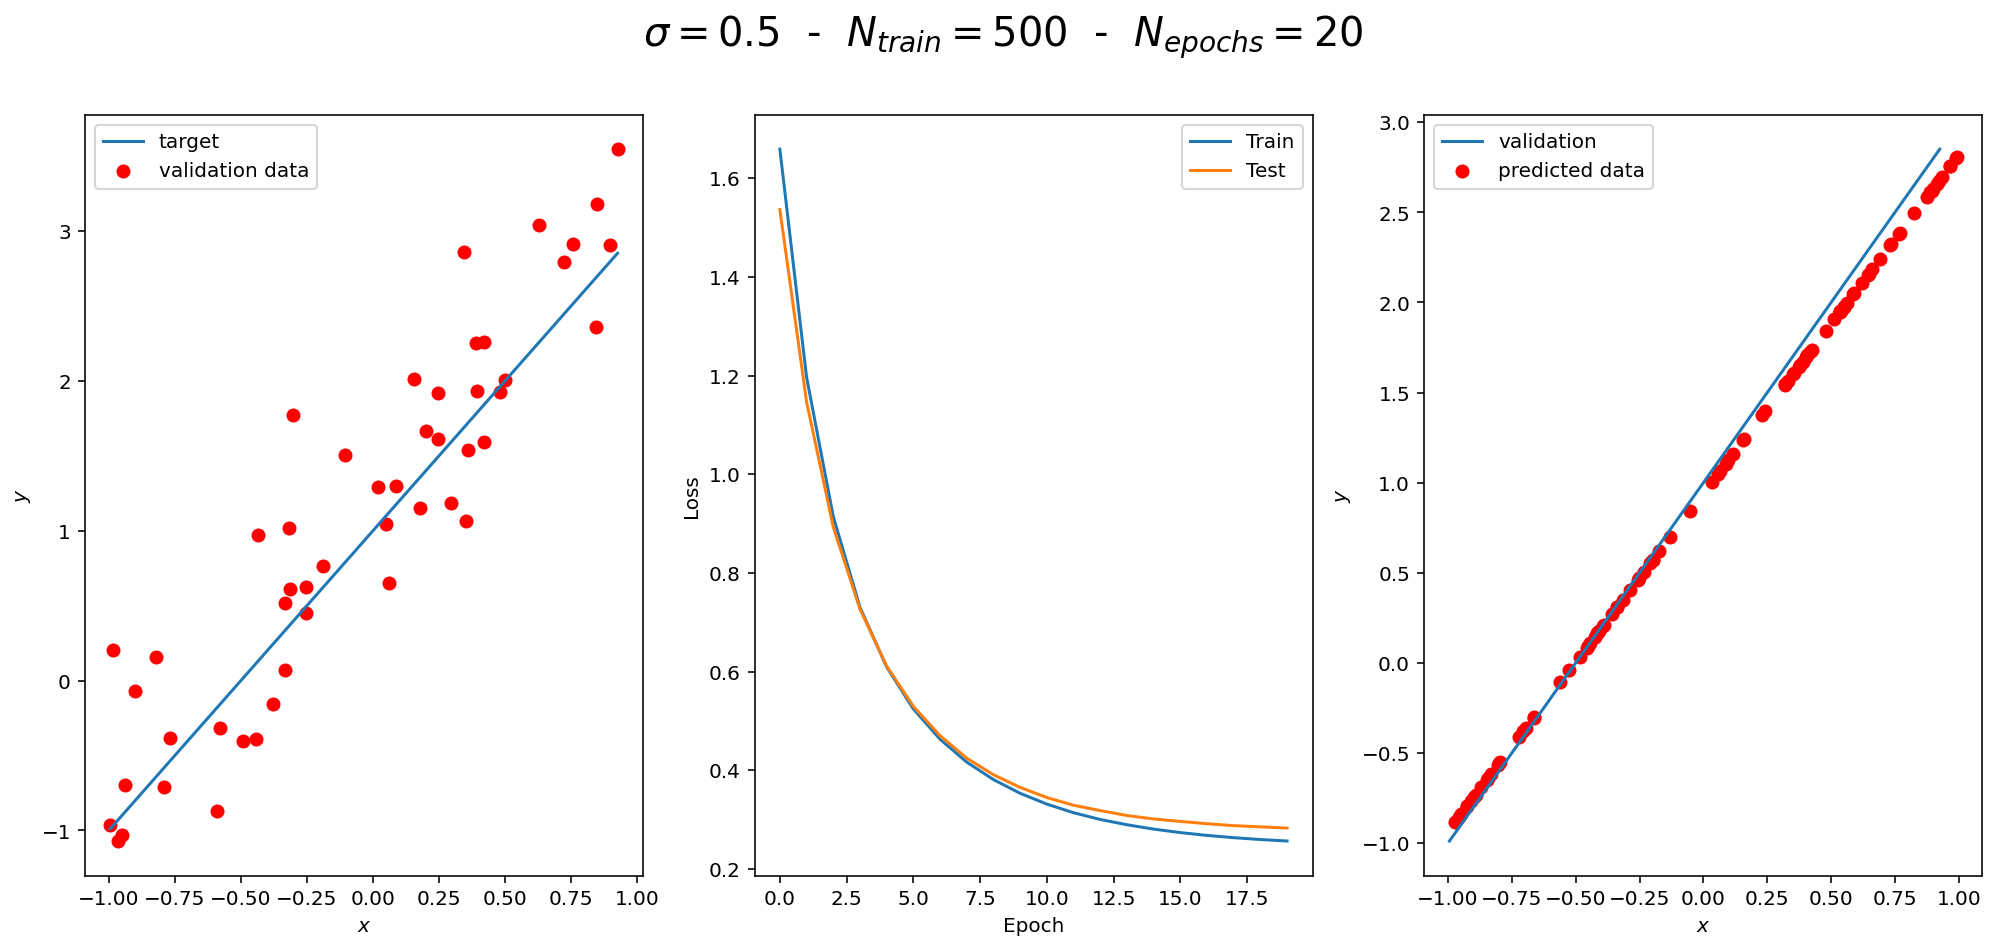

In [3]:
sigma = 0.5
N_train = 500
N_epochs = 20
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  0.21681183576583862
Final test accuracy is: 0.21681183576583862


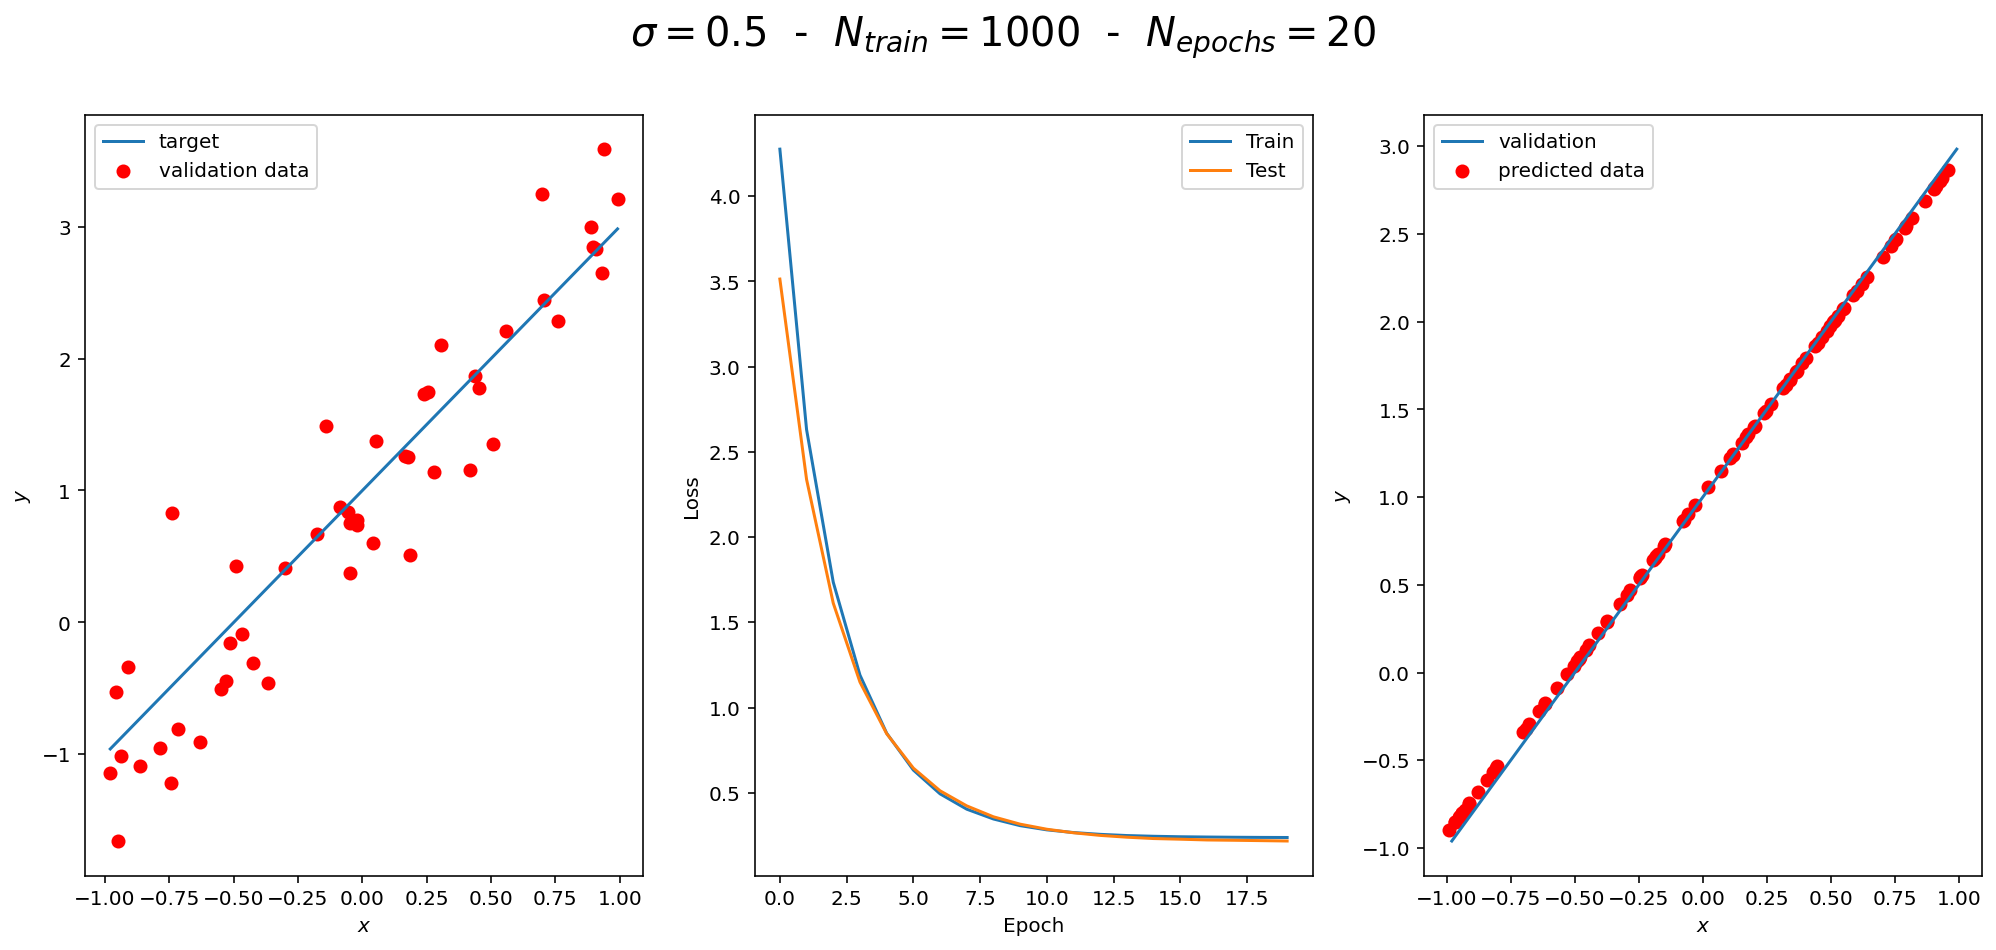

In [4]:
sigma = 0.5
N_train = 1000
N_epochs = 20
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  1.1123274564743042
Final test accuracy is: 1.1123274564743042


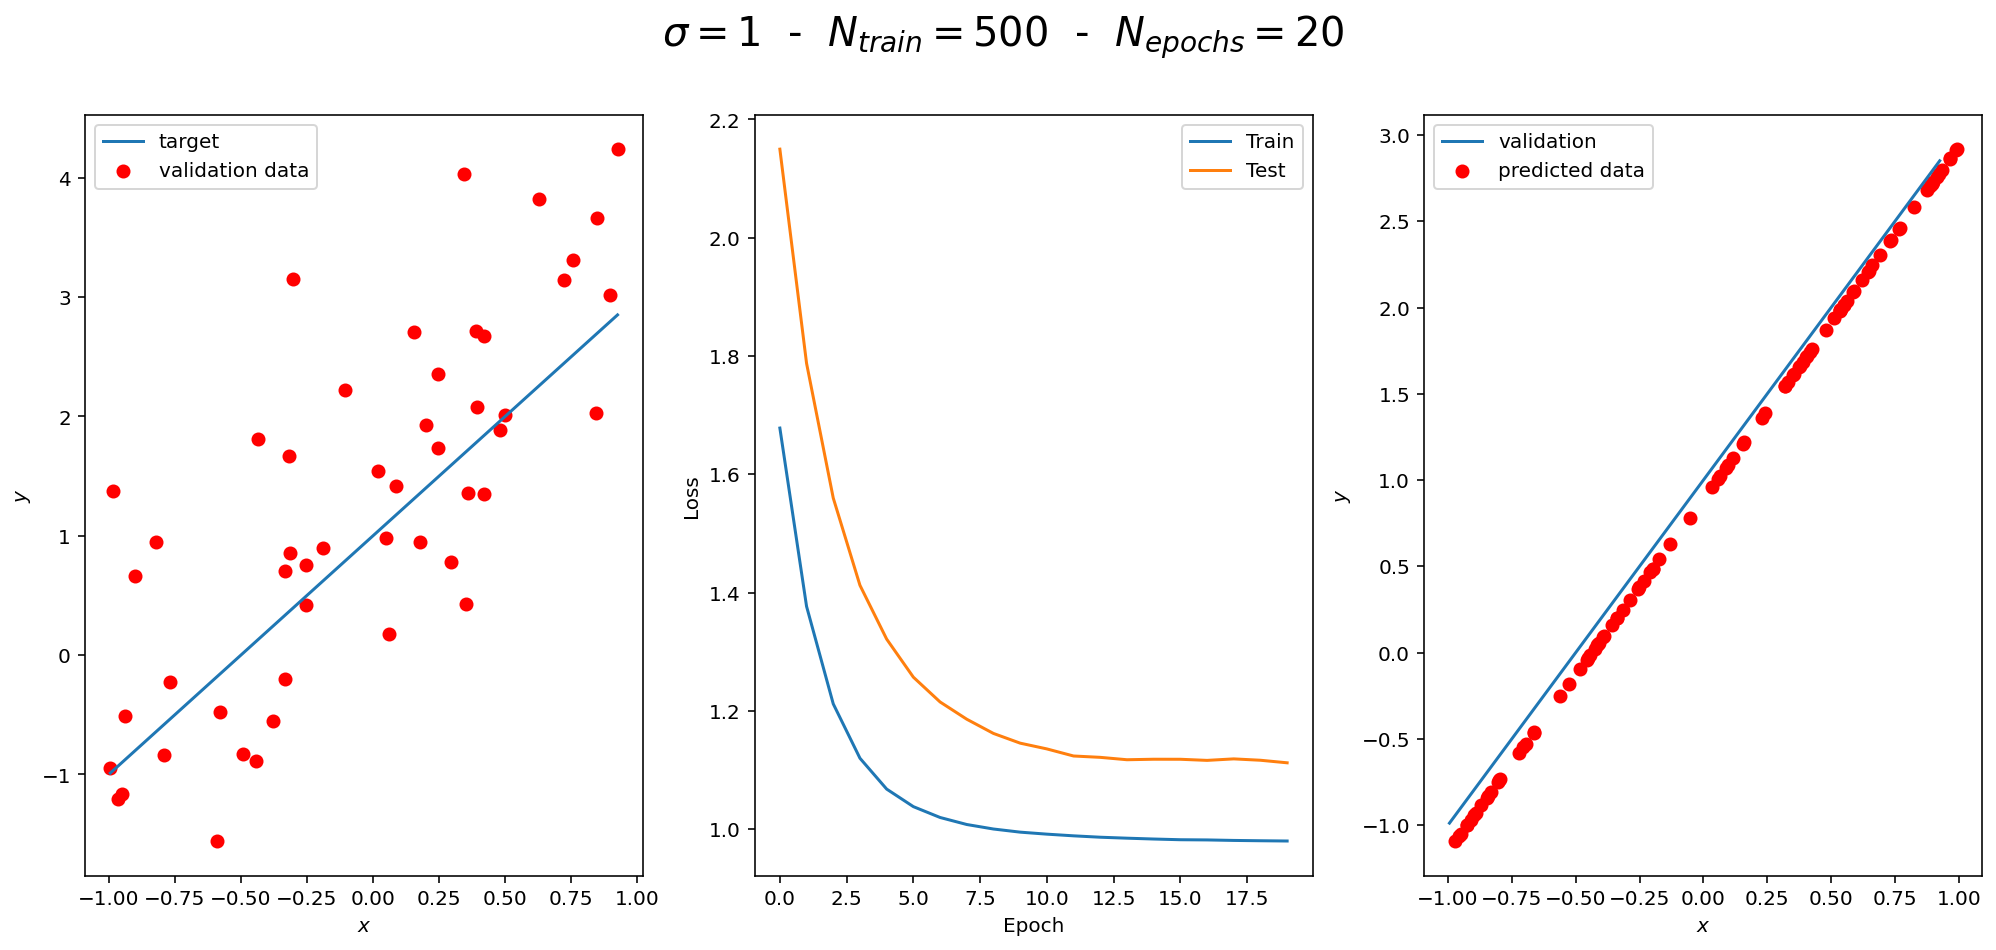

In [5]:
sigma = 1
N_train = 500
N_epochs = 20
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  0.8436664342880249
Final test accuracy is: 0.8436664342880249


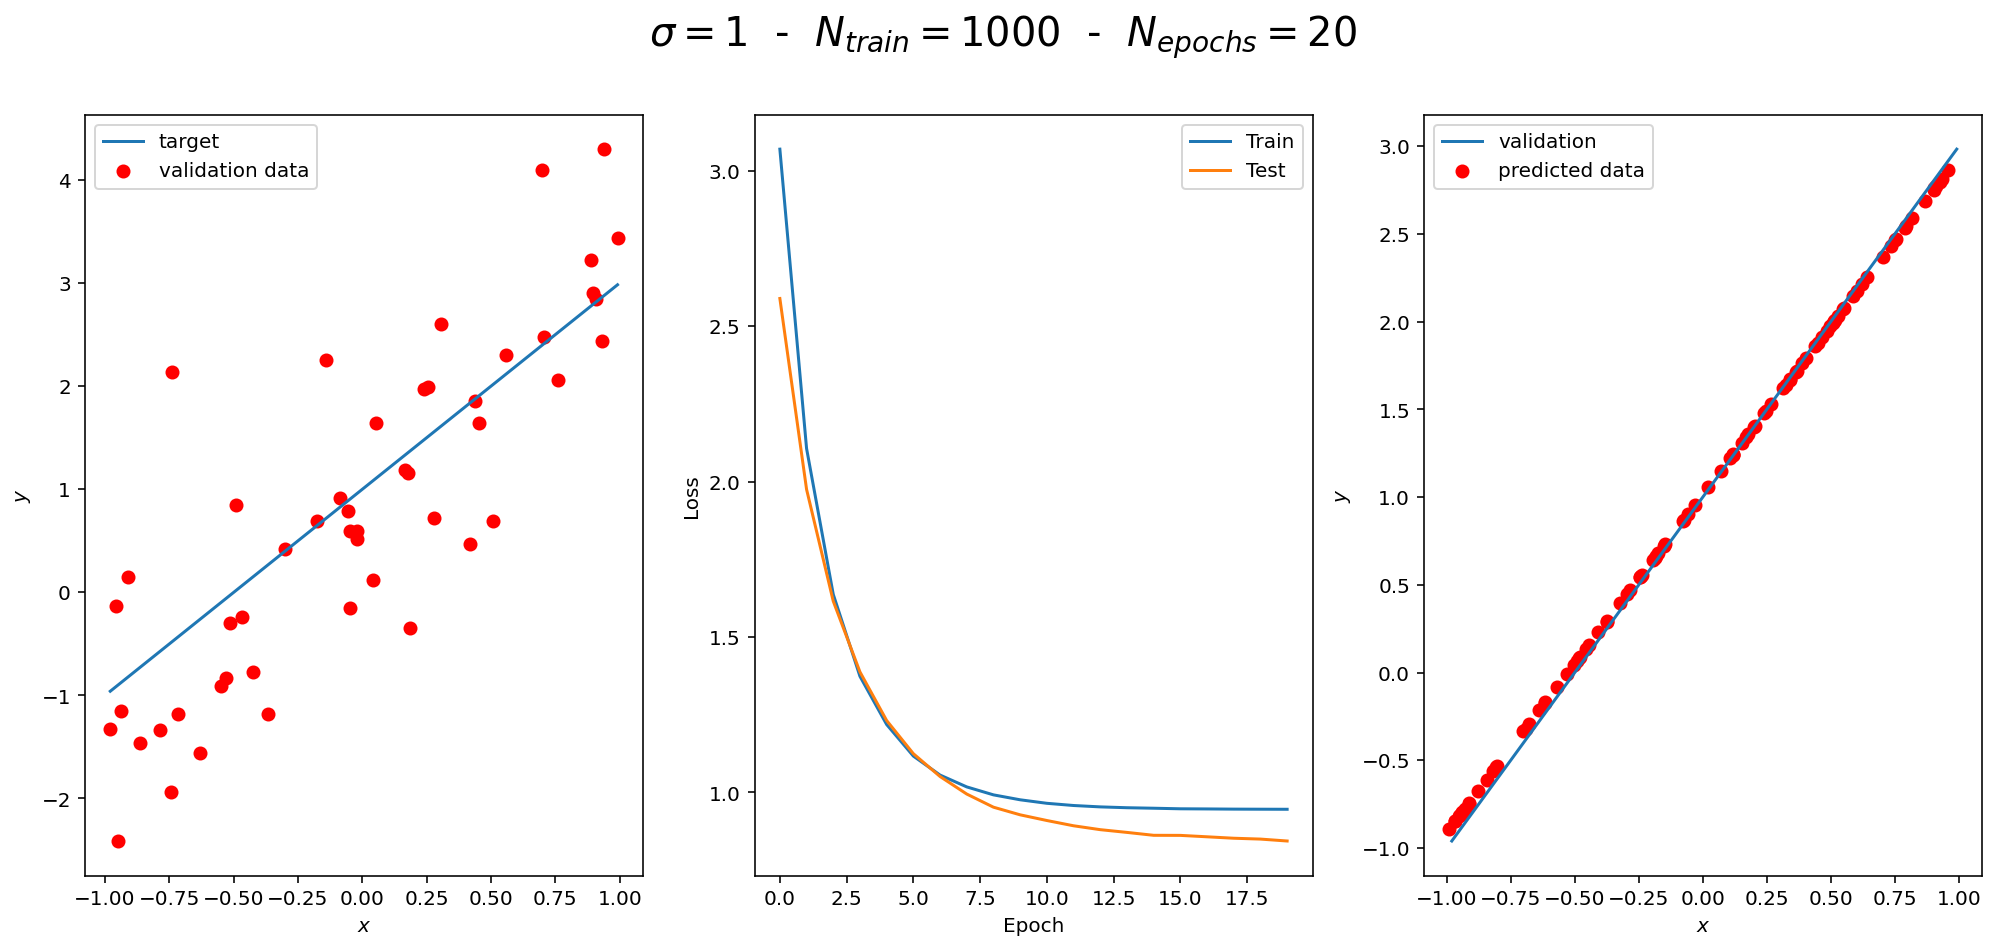

In [6]:
sigma = 1
N_train = 1000
N_epochs = 20
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  0.27838334441185
Final test accuracy is: 0.27838334441185


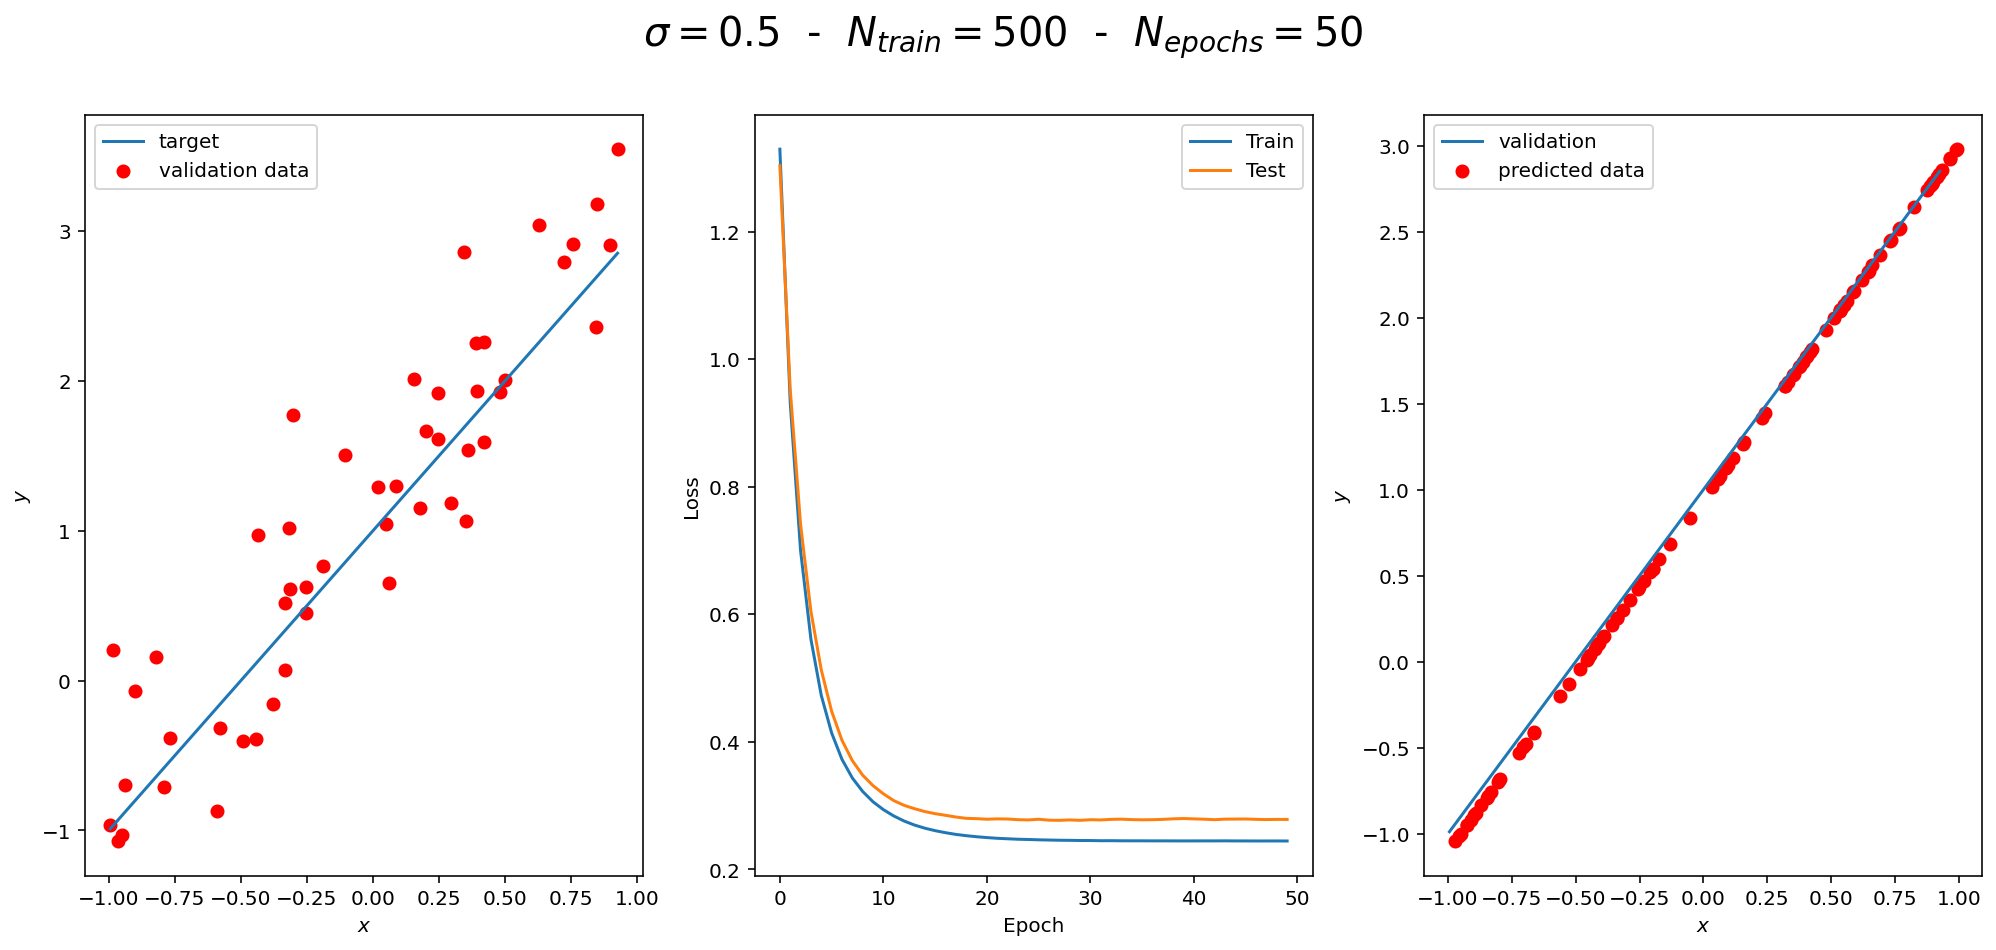

In [7]:
sigma = 0.5
N_train = 500
N_epochs = 50
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  0.21005576848983765
Final test accuracy is: 0.21005576848983765


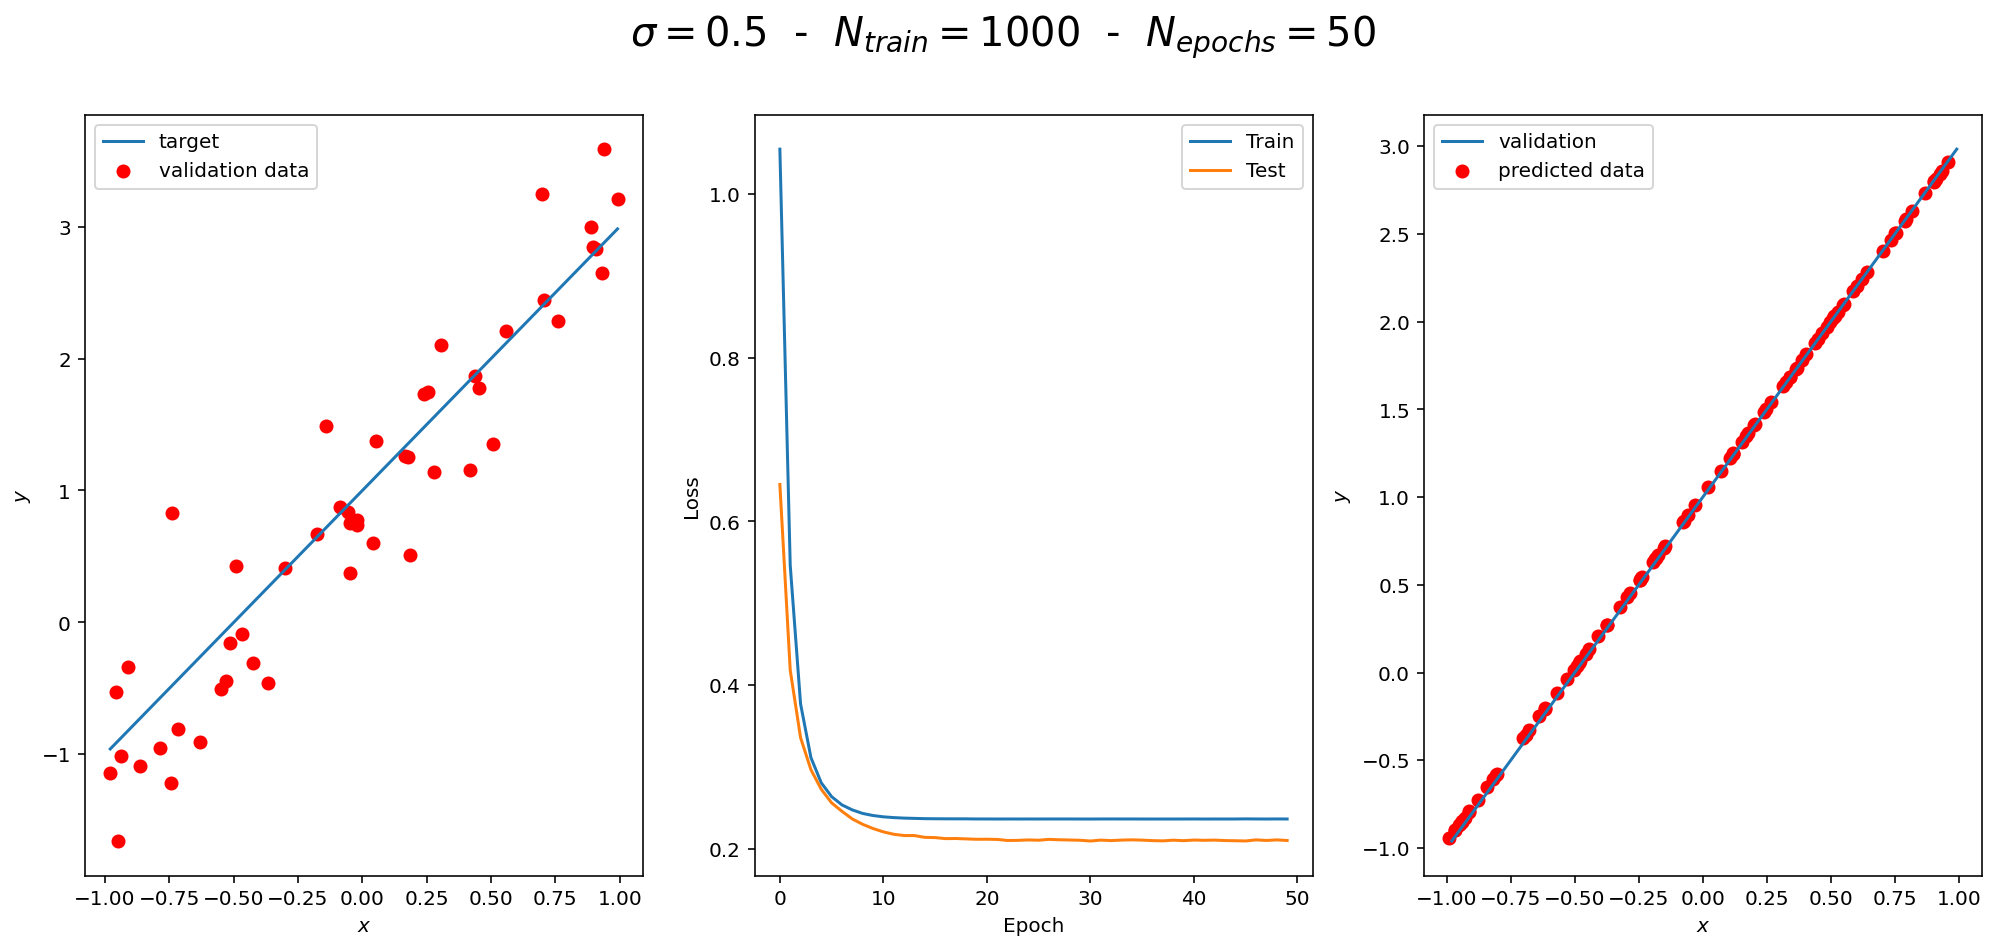

In [8]:
sigma = 0.5
N_train = 1000
N_epochs = 50
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  1.112865924835205
Final test accuracy is: 1.112865924835205


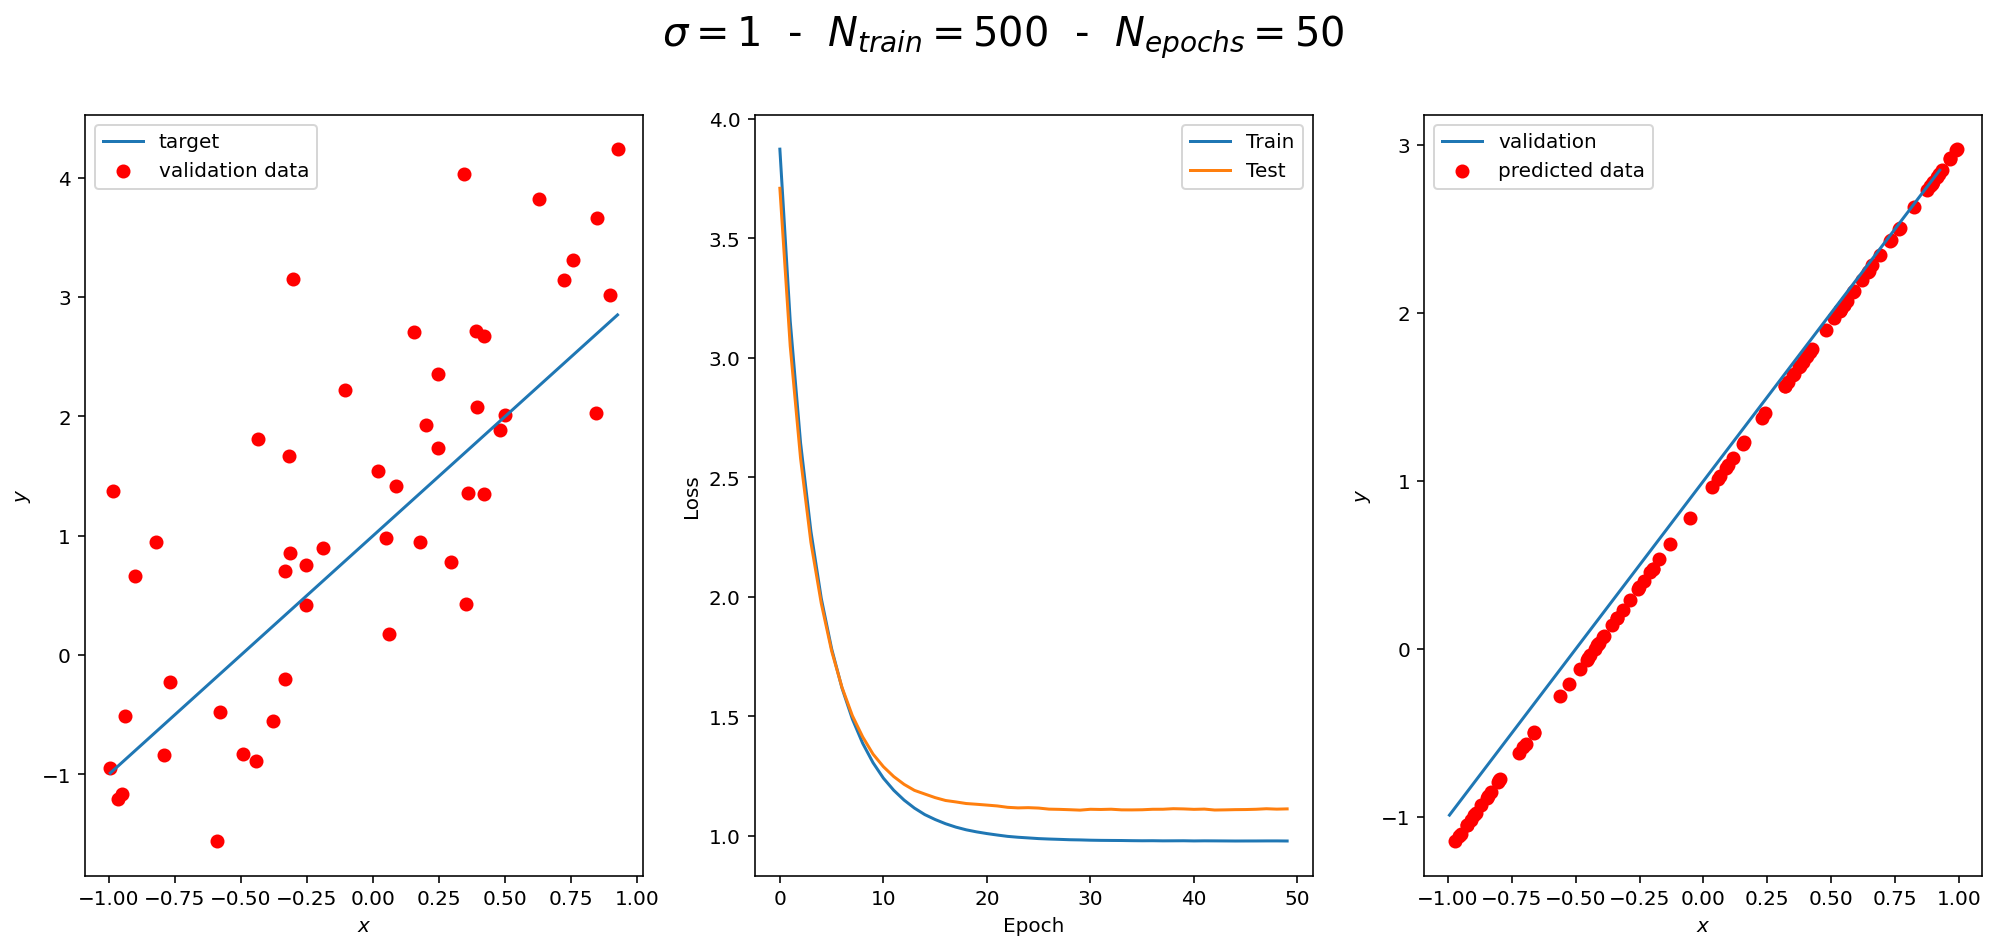

In [9]:
sigma = 1
N_train = 500
N_epochs = 50
model_linear(sigma, N_train, N_epochs)


4/4 [==============================] - 0s 3ms/step
Final model loss is:  0.8348538279533386
Final test accuracy is: 0.8348538279533386


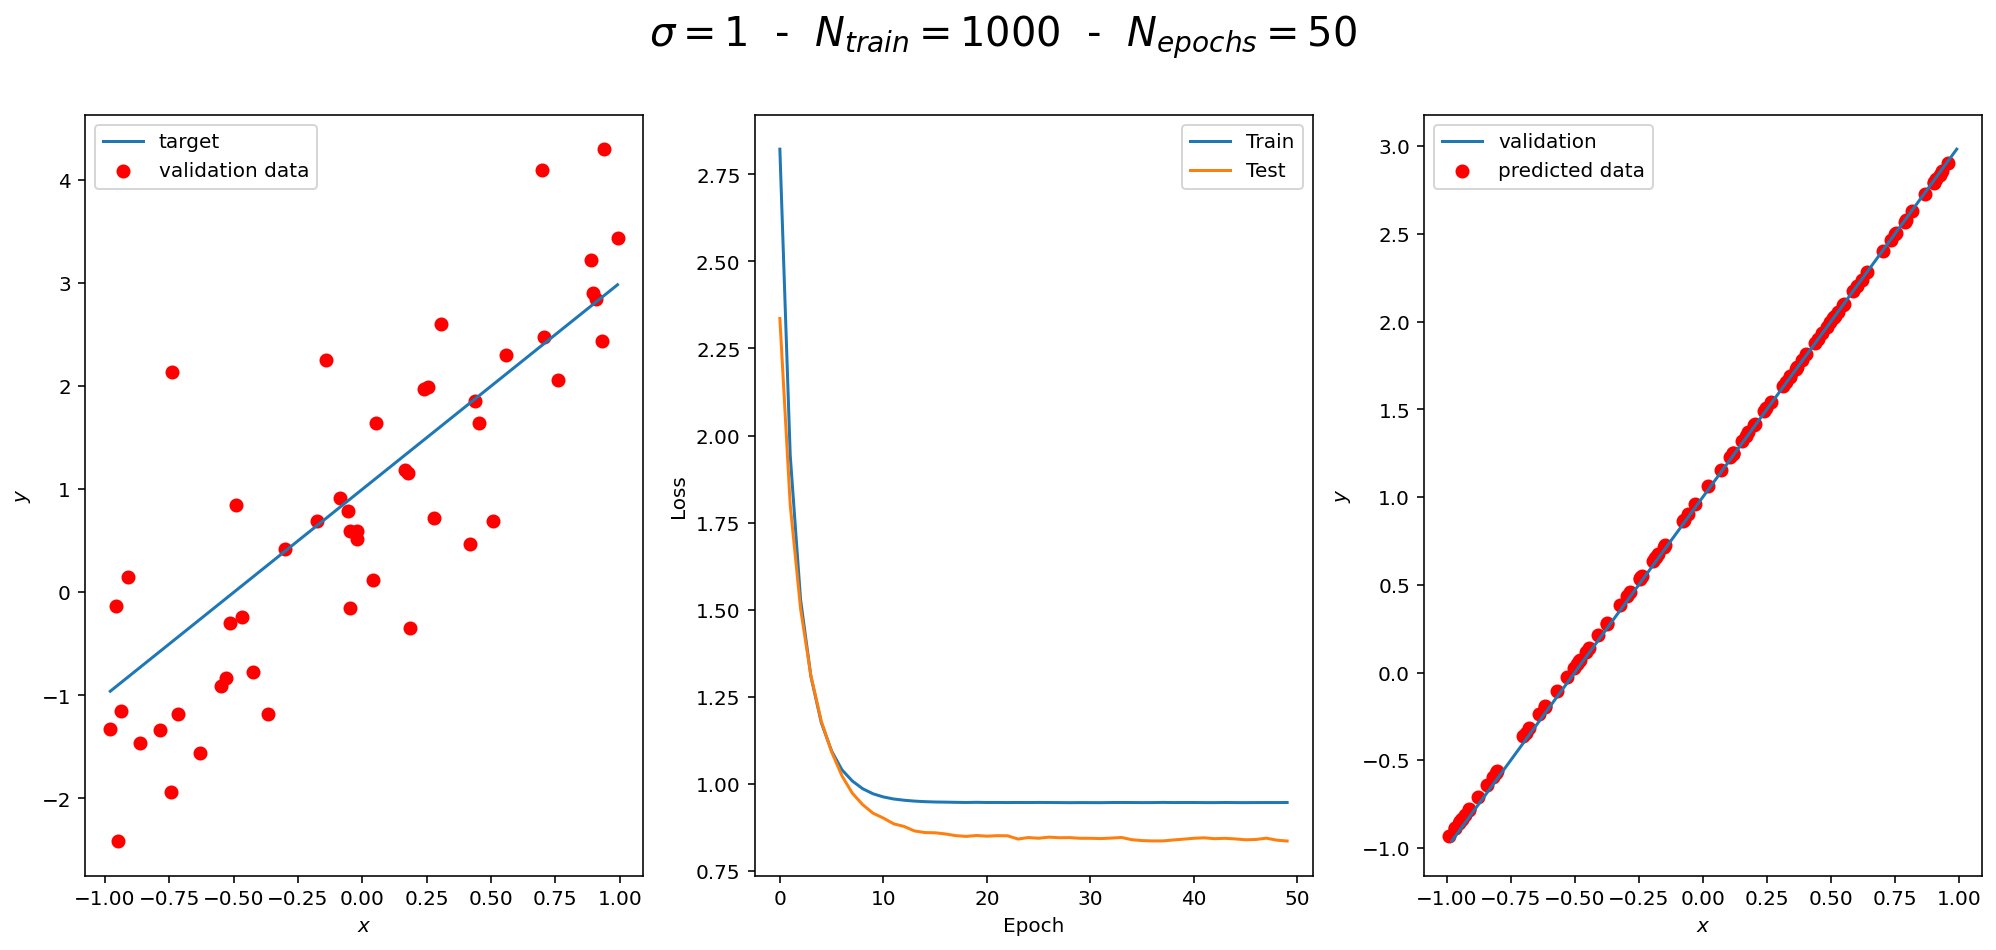

In [10]:
sigma = 1
N_train = 1000
N_epochs = 50
model_linear(sigma, N_train, N_epochs)

As could be expected the main trends that can be noticed are:
- The result for a NN trained for a longer number of epochs is better
- An higher value of the noise means a higher value of the minimum loss (which for $\sigma = 1$ and $N_{epochs} = 50$ stabilizes to $1$ after $10$ epochs)
- The higher the number of training points the faster the loss converges to its minimum

### Exercise 11.02: NN for polynomial function

The first case was a trivial one since the job could be done only by one neuron in the network being the target function a linear one. The following case regards the fitting of noisy data coming from a polynomial of third order. In this case the goal is to tune the parameters entering the construction and the training of the Neural Network in order to find the ideal balance between complexity (e.g. layers) and performance. The chosen fluctuations are chosen with $\sigma = 0.1$

In [11]:
def model_poly_1(sigma, N_train, N_epochs, model, opt, loss):
  #real parameters:
  #ax^3bx^2+cx+d
  a = 4
  b = -3
  c = -2
  d = 3
  np.random.seed(0)
  x_train = np.random.uniform(-1, 1, N_train)
  x_valid = np.random.uniform(-1, 1, 50)
  x_valid.sort()
  y_target = a + b*x_valid + c*(x_valid)**2 + d*(x_valid)**3 # ideal (target) polynomial function

  sigma = sigma # noise standard deviation
  y_train = np.random.normal(a + b*x_train + c*(x_train)**2 + d*(x_train)**3, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(a + b*x_valid + c*(x_valid)**2 + d*(x_valid)**3, sigma)
  fig, axs = plt.subplots(1,3, figsize=(15, 5))
  plt.suptitle(r'$\sigma = $' + str(sigma) + '  -  ' + r'$N_{train} = $' + str(N_train) + '  -  ' + 
                  r'$N_{epochs} = $' +str(N_epochs), size=20)
  axs[0].plot(x_valid, y_target, label='target')
  axs[0].scatter(x_valid, y_valid, color='r', label='validation data')
  axs[0].legend()

  # compile the model choosing optimizer, loss and metrics objects
  model.compile(optimizer=opt, loss=loss, metrics=[loss])
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose = 0)
  #print(model.get_weights());
  print(model.summary());
  # evaluate model
  score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  axs[1].plot(history.history['loss'], label = "Train")
  axs[1].plot(history.history['val_loss'], label = "Test")
  axs[1].legend()
  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  axs[2].scatter(x_predicted, y_predicted,color='r', label = "Predicted")
  axs[2].plot(x_valid, y_target, label = "Target")
  axs[2].legend()

In [12]:
def model_poly_2(sigma, N_train, N_epochs, model, type, loss):
  #real parameters:
  #ax^3bx^2+cx+d
  a = 4
  b = -3
  c = -2
  d = 3
  np.random.seed(0)
  x_train = np.random.uniform(-1, 1, N_train)
  x_valid = np.random.uniform(-1, 1, 50)
  x_valid.sort()
  y_target = a + b*x_valid + c*(x_valid)**2 + d*(x_valid)**3 # ideal (target) polynomial function

  sigma = sigma # noise standard deviation
  y_train = np.random.normal(a + b*x_train + c*(x_train)**2 + d*(x_train)**3, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(a + b*x_valid + c*(x_valid)**2 + d*(x_valid)**3, sigma)
  fig, axs = plt.subplots(1,3, figsize=(15, 5))
  plt.suptitle(r'$\sigma = $' + str(sigma) + '  -  ' + r'$N_{train} = $' + str(N_train) + '  -  ' + 
                  r'$N_{epochs} = $' +str(N_epochs), size=20)
  axs[0].plot(x_valid, y_target, label='target')
  axs[0].scatter(x_valid, y_valid, color='r', label='validation data')
  axs[0].legend()

  # compile the model choosing optimizer, loss and metrics objects
  model.compile(optimizer=type, loss=loss, metrics=[loss])
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose = 0)
  #print(model.get_weights());
  print(model.summary());
  # evaluate model
  score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  axs[1].plot(history.history['loss'], label = "Train")
  axs[1].plot(history.history['val_loss'], label = "Test")
  axs[1].legend()
  x_predicted = np.random.uniform(-2, 2, 100)
  y_predicted = model.predict(x_predicted)
  x = np.random.uniform(-2, 2, 100)
  x.sort()
  y = a + b*x + c*(x)**2 + d*(x)**3
  axs[2].scatter(x_predicted, y_predicted,color='r', label = "Predicted")
  axs[2].plot(x, y, label = "Target")
  axs[2].legend()

First of all let's try with the same model used for the linear case (only one neuron, so two trainable parameters)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 5ms/step - loss: 0.6954 - mse: 0.6954

Test loss: 0.6953756809234619
Test accuracy: 0.6953756809234619
4/4 [==============================] - 0s 3ms/step


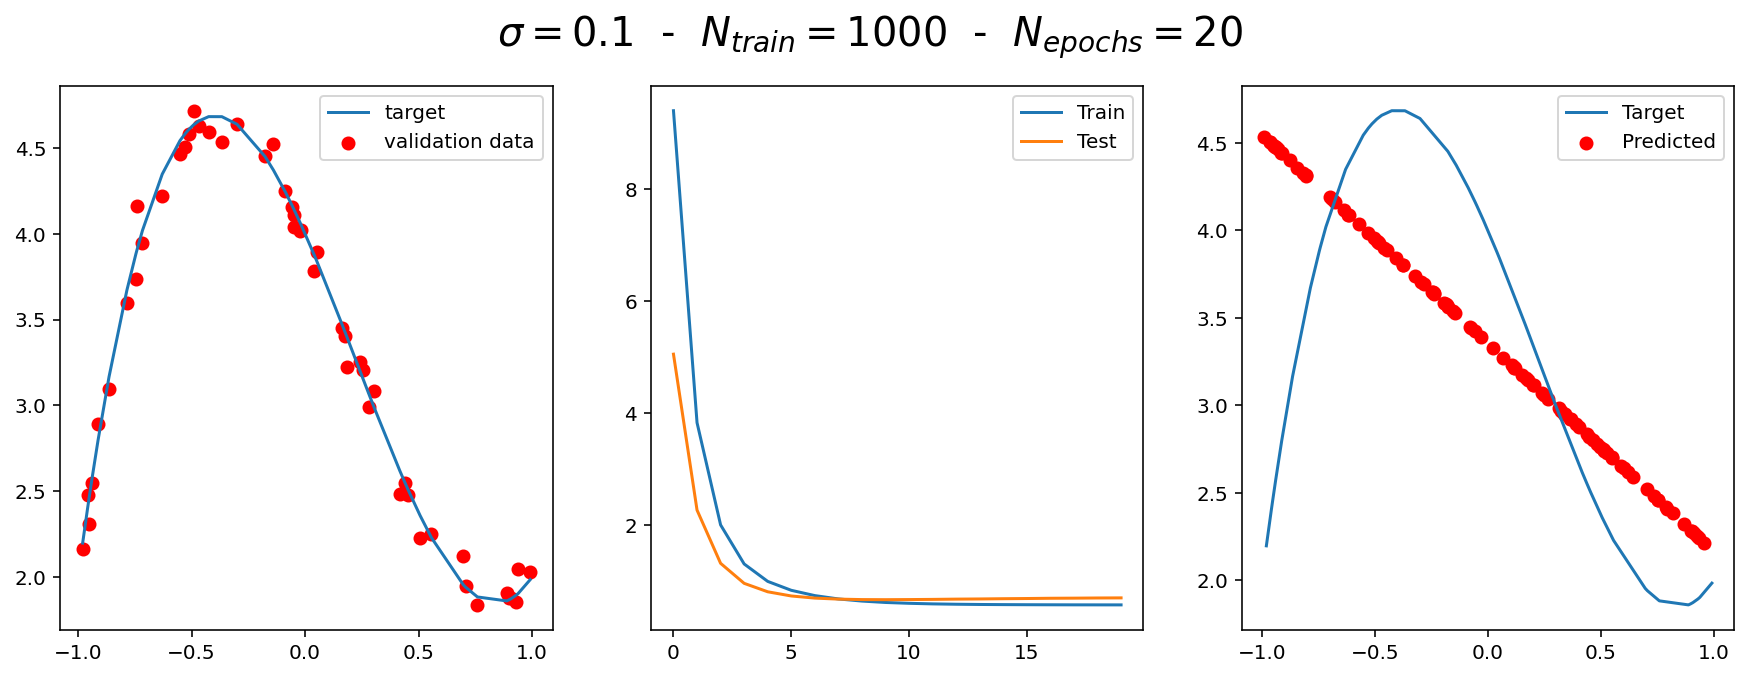

In [14]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model_poly_1(0.1, 1000, 20, model, 'sgd', 'mse')

It is pretty clear that the only kind of function that this NN can guess is a linear one so not suitable for this problem.

Next let's try an NN with only 1 hidden layer consisting of 2 neurons.

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 2)                 4         
                                                                 
 dense_40 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 10ms/step - loss: 0.0202 - mse: 0.0202

Test loss: 0.02015290968120098
Test accuracy: 0.02015290968120098
4/4 [==============================] - 0s 3ms/step


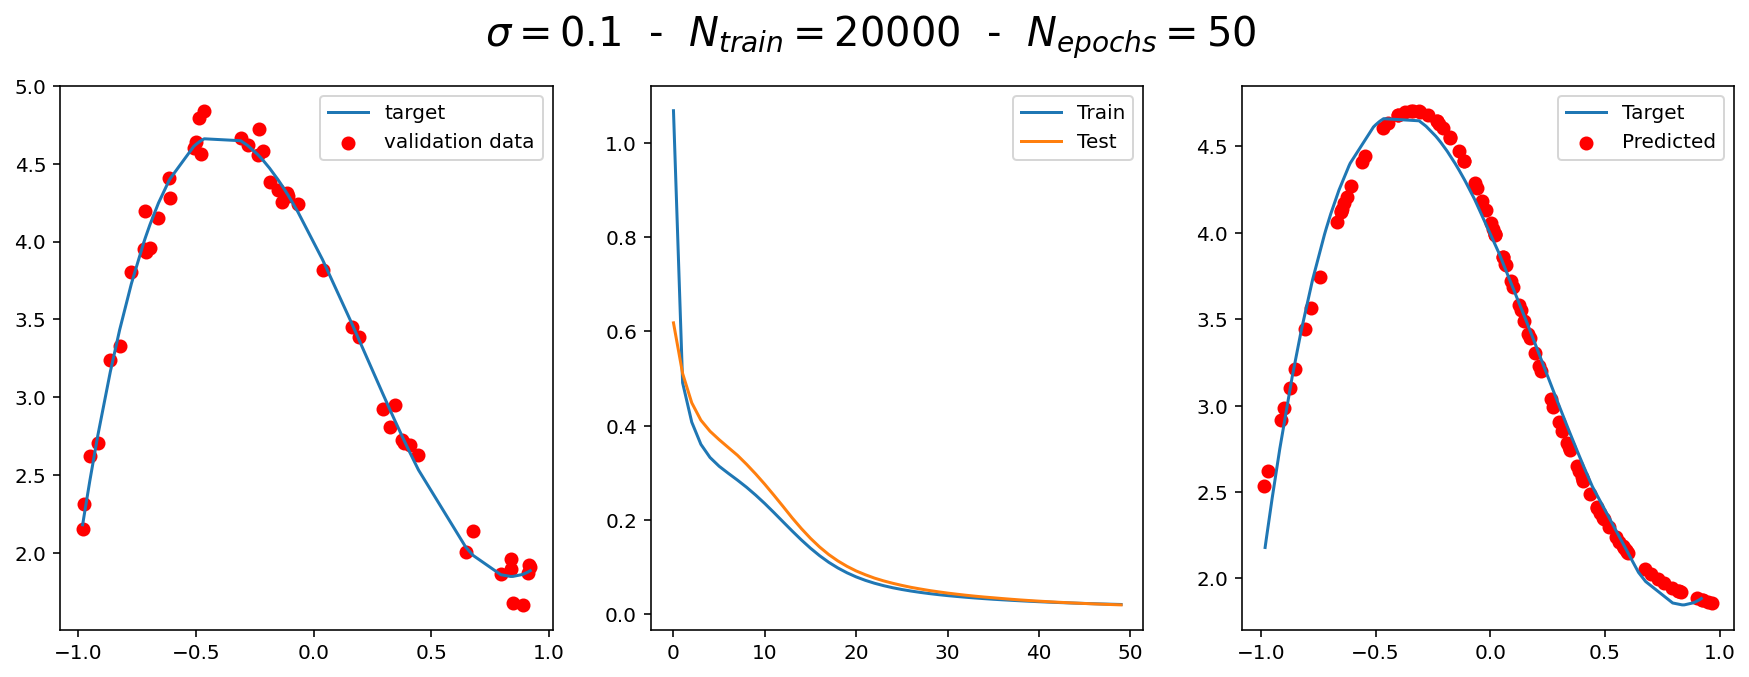

In [21]:
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='sigmoid'))
model.add(Dense(1))

model_poly_1(0.1, 20000, 50, model, 'sgd', 'mse')

In this case a really big number of data points was used. This was just to test the predictive power of a small NN: it can be seen that the nonlinearity of the activation funciton makes all the difference in this case with respect to the linear case with only one neuron. Anyway the problem here is that to reach a decent result a really big dataset had to be used.

Next another try is to still have 1 hidden layer but much broader: 100 neurons

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 100)               200       
                                                                 
 dense_42 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 7ms/step - loss: 0.0946 - mse: 0.0946

Test loss: 0.09461570531129837
Test accuracy: 0.09461570531129837
4/4 [==============================] - 0s 4ms/step


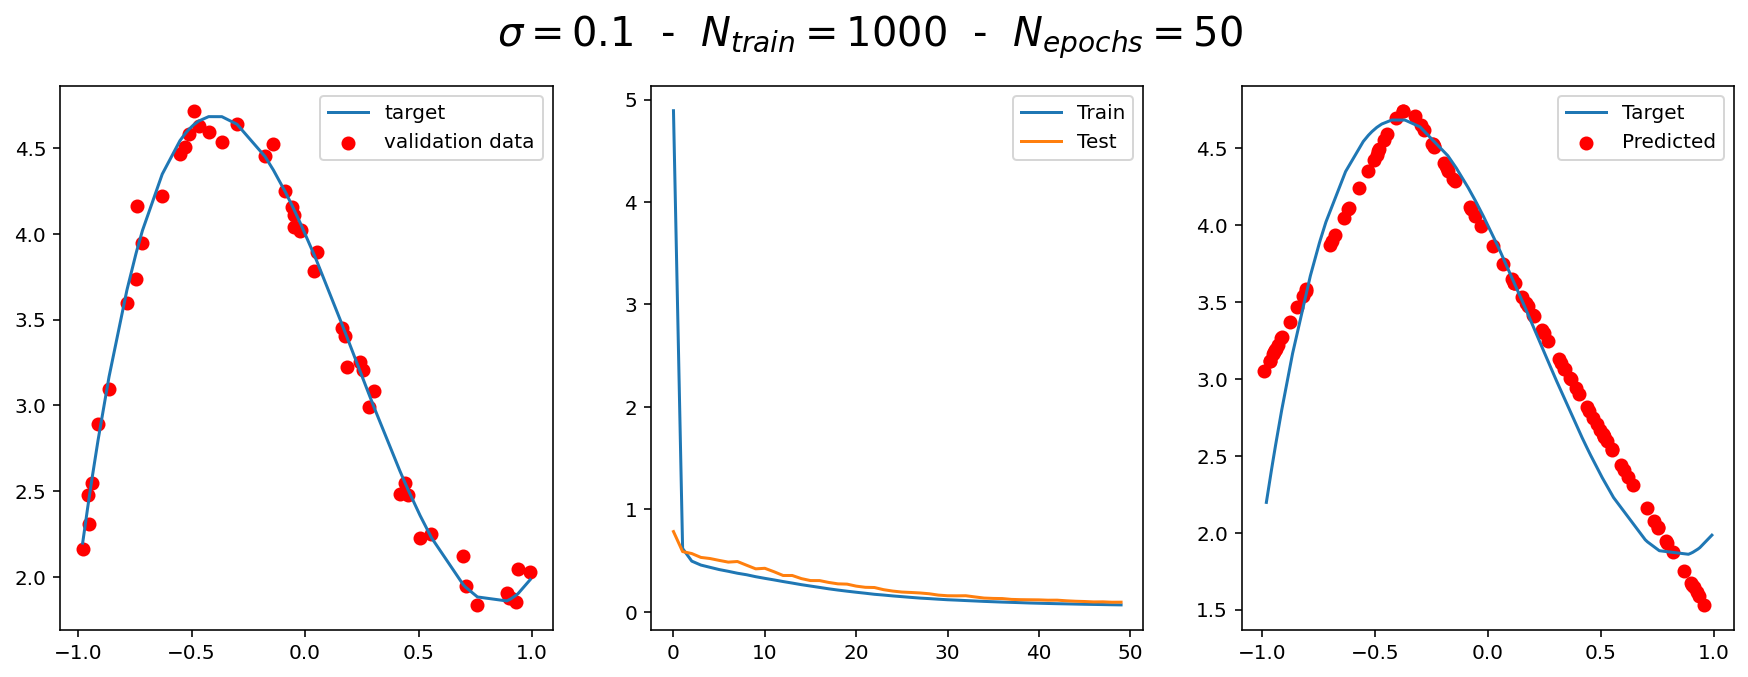

In [22]:
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(1,), activation='relu'))
model.add(Dense(1))

model_poly_1(0.1, 1000, 50, model, 'sgd', 'mse')

Here the model is made more complex: the structure is now $(5;4;3;2;1)$. 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 5)                 10        
                                                                 
 dense_44 (Dense)            (None, 4)                 24        
                                                                 
 dense_45 (Dense)            (None, 3)                 15        
                                                                 
 dense_46 (Dense)            (None, 2)                 8         
                                                                 
 dense_47 (Dense)            (None, 1)                 3         
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 6ms/step -

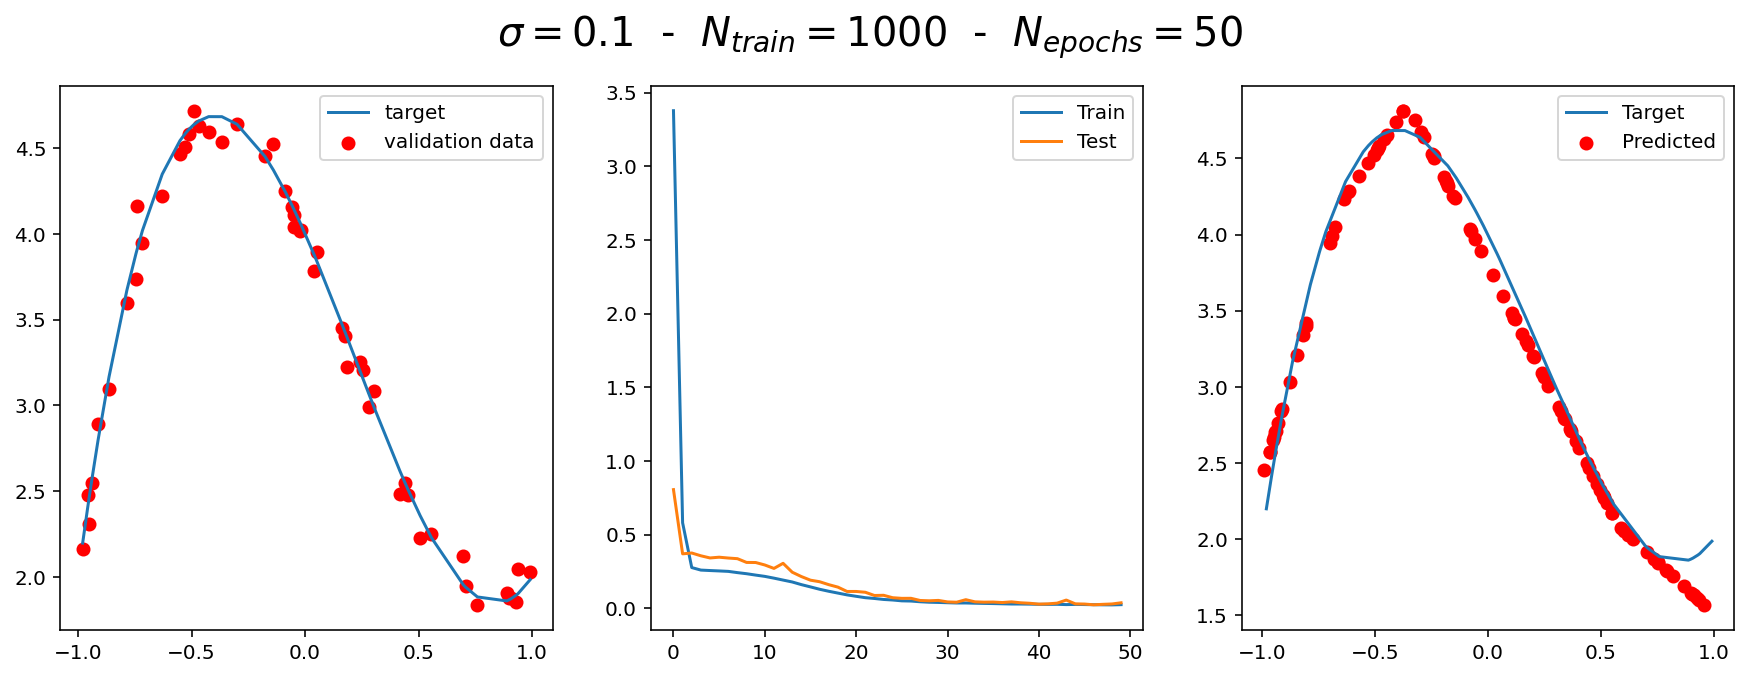

In [23]:
model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(1,), activation='relu'))
model.add(Dense(4))
model.add(Dense(3))
model.add(Dense(2))
model.add(Dense(1))

model_poly_1(0.1, 1000, 50, model, 'sgd', 'mse')

While still showing a kind of broken line trend the result is better now. It is interesting to notice that the parameters are less than the case with 100 neurons but still the result is closer to the target.

Now a model with structure $(15,12,9,4,4,1)$ is analyzed. 

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 15)                30        
                                                                 
 dense_61 (Dense)            (None, 12)                192       
                                                                 
 dense_62 (Dense)            (None, 9)                 117       
                                                                 
 dense_63 (Dense)            (None, 4)                 40        
                                                                 
 dense_64 (Dense)            (None, 4)                 20        
                                                                 
 dense_65 (Dense)            (None, 1)                 5         
                                                                 
Total params: 404
Trainable params: 404
Non-trainable

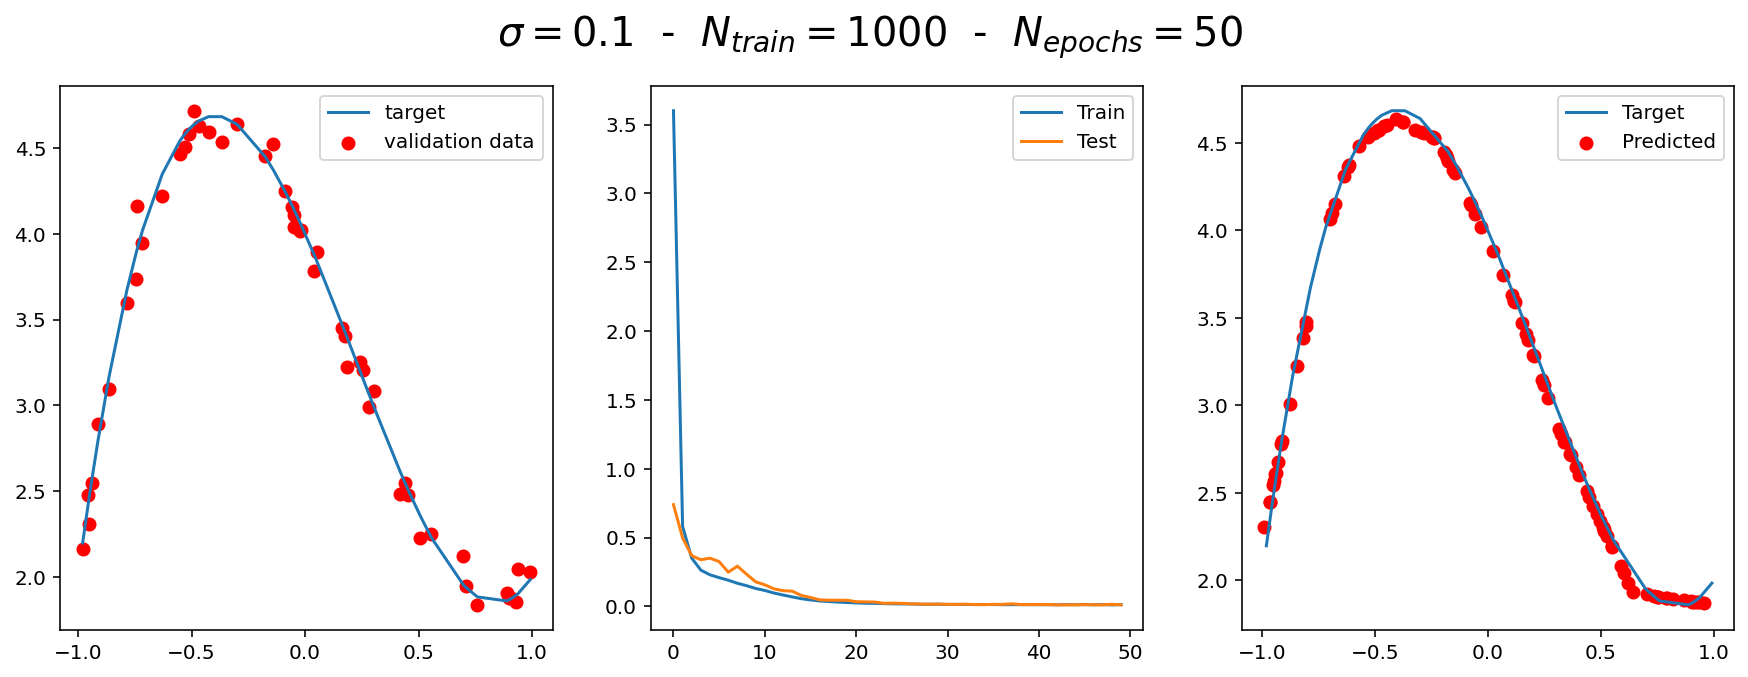

In [26]:
model = tf.keras.Sequential()
model.add(Dense(15, input_shape=(1,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model_poly_1(0.1, 1000, 50, model, 'sgd', 'mse')

The result is much better than before apart from a linear trend in the right part of the graph. It is interesting to notice that this model has 404 trainable parameters so almost as many as the $(100,1)$ case while performing much better on the polynomial.


The last model has the structure given by $(20,15,11,8,5,1)$

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 20)                40        
                                                                 
 dense_73 (Dense)            (None, 15)                315       
                                                                 
 dense_74 (Dense)            (None, 11)                176       
                                                                 
 dense_75 (Dense)            (None, 8)                 96        
                                                                 
 dense_76 (Dense)            (None, 5)                 45        
                                                                 
 dense_77 (Dense)            (None, 1)                 6         
                                                                 
Total params: 678
Trainable params: 678
Non-trainable

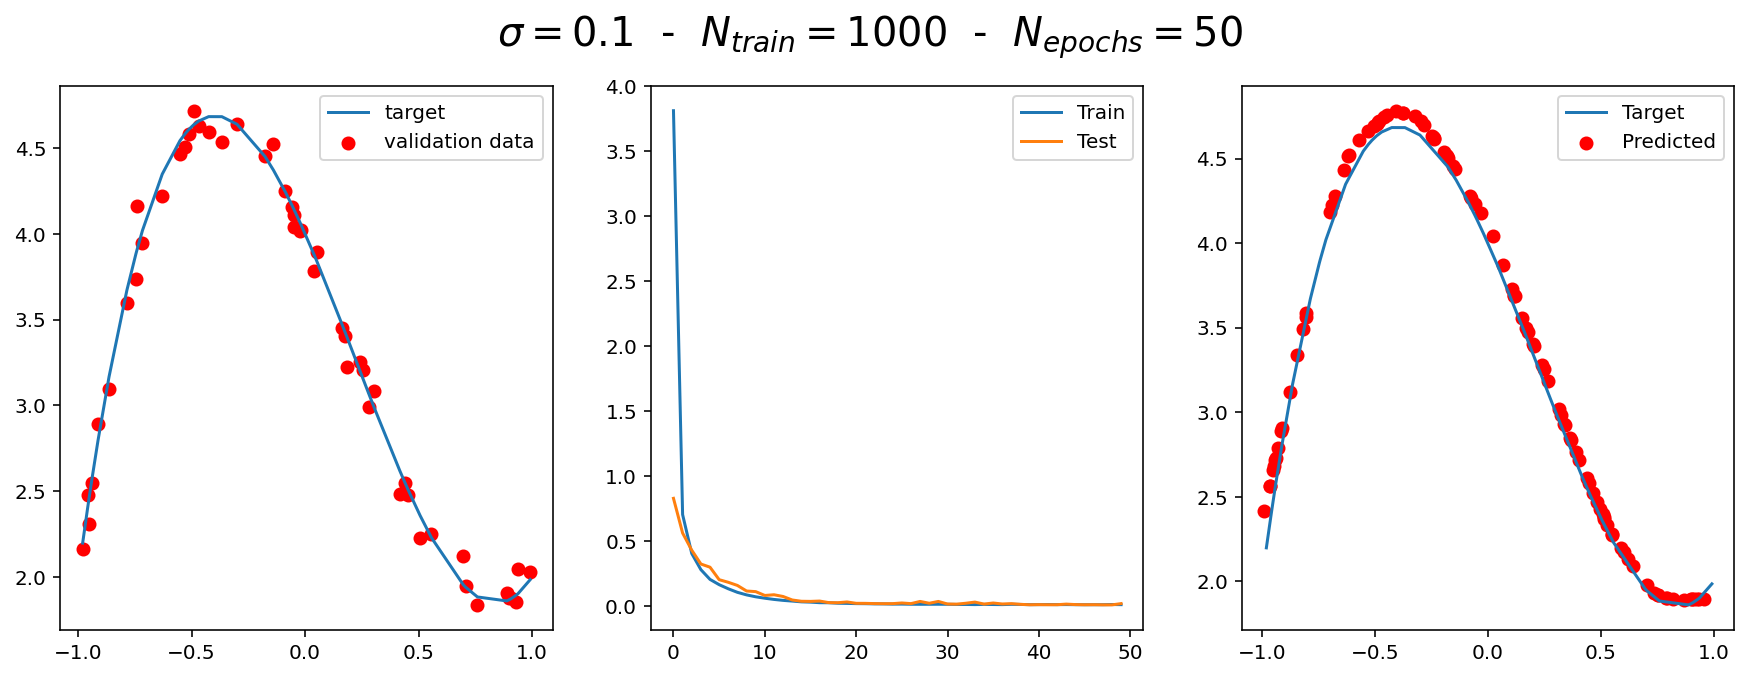

In [28]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model_poly_1(0.1, 1000, 50, model, 'sgd', 'mse')

This is chosen as the best model. Now for this model the optimizer, the activation function and the loss are varied, then the best performing combination is chosen. The following options are evaluated:
- Activation function: REctified Linear Unit or sigmoid.
- Optimization: Adam or Stochastic Gradient Descent.
- Loss: Mean Squared Error


## RELU; Adam; MSE

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 20)                40        
                                                                 
 dense_91 (Dense)            (None, 15)                315       
                                                                 
 dense_92 (Dense)            (None, 11)                176       
                                                                 
 dense_93 (Dense)            (None, 8)                 96        
                                                                 
 dense_94 (Dense)            (None, 5)                 45        
                                                                 
 dense_95 (Dense)            (None, 1)                 6         
                                                                 
Total params: 678
Trainable params: 678
Non-trainable

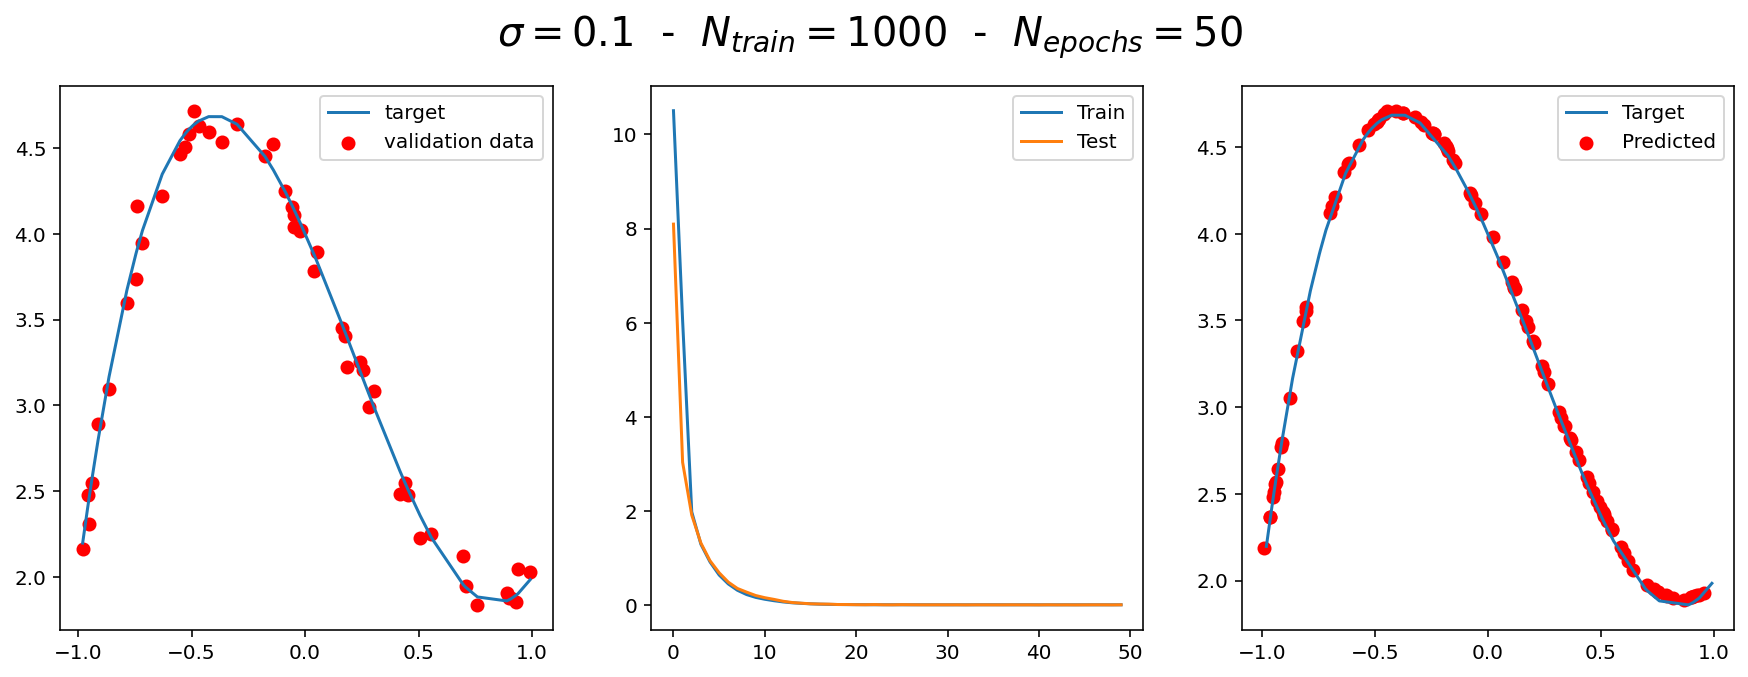

In [31]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model_poly_1(0.1, 1000, 50, model, 'Adam', 'mse')

## Sigmoid; SGD; MSE

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 20)                40        
                                                                 
 dense_179 (Dense)           (None, 15)                315       
                                                                 
 dense_180 (Dense)           (None, 11)                176       
                                                                 
 dense_181 (Dense)           (None, 8)                 96        
                                                                 
 dense_182 (Dense)           (None, 5)                 45        
                                                                 
 dense_183 (Dense)           (None, 1)                 6         
                                                                 
Total params: 678
Trainable params: 678
Non-trainable

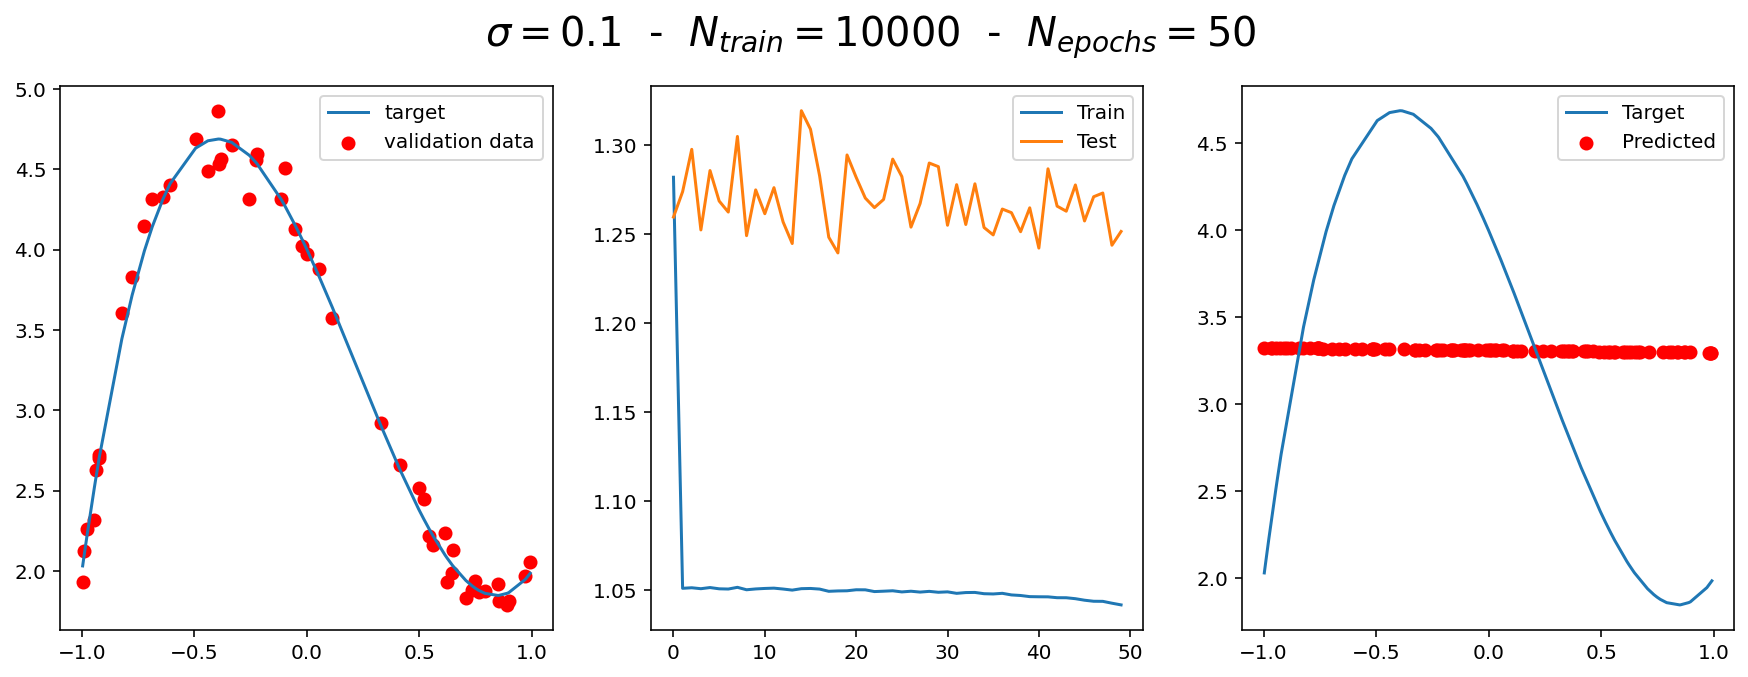

In [45]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1))

model_poly_1(0.1, 10000, 50, model, 'sgd', 'mse')

## Sigmoid; ADAM; MSE

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 20)                40        
                                                                 
 dense_166 (Dense)           (None, 15)                315       
                                                                 
 dense_167 (Dense)           (None, 11)                176       
                                                                 
 dense_168 (Dense)           (None, 8)                 96        
                                                                 
 dense_169 (Dense)           (None, 5)                 45        
                                                                 
 dense_170 (Dense)           (None, 1)                 6         
                                                                 
Total params: 678
Trainable params: 678
Non-trainable

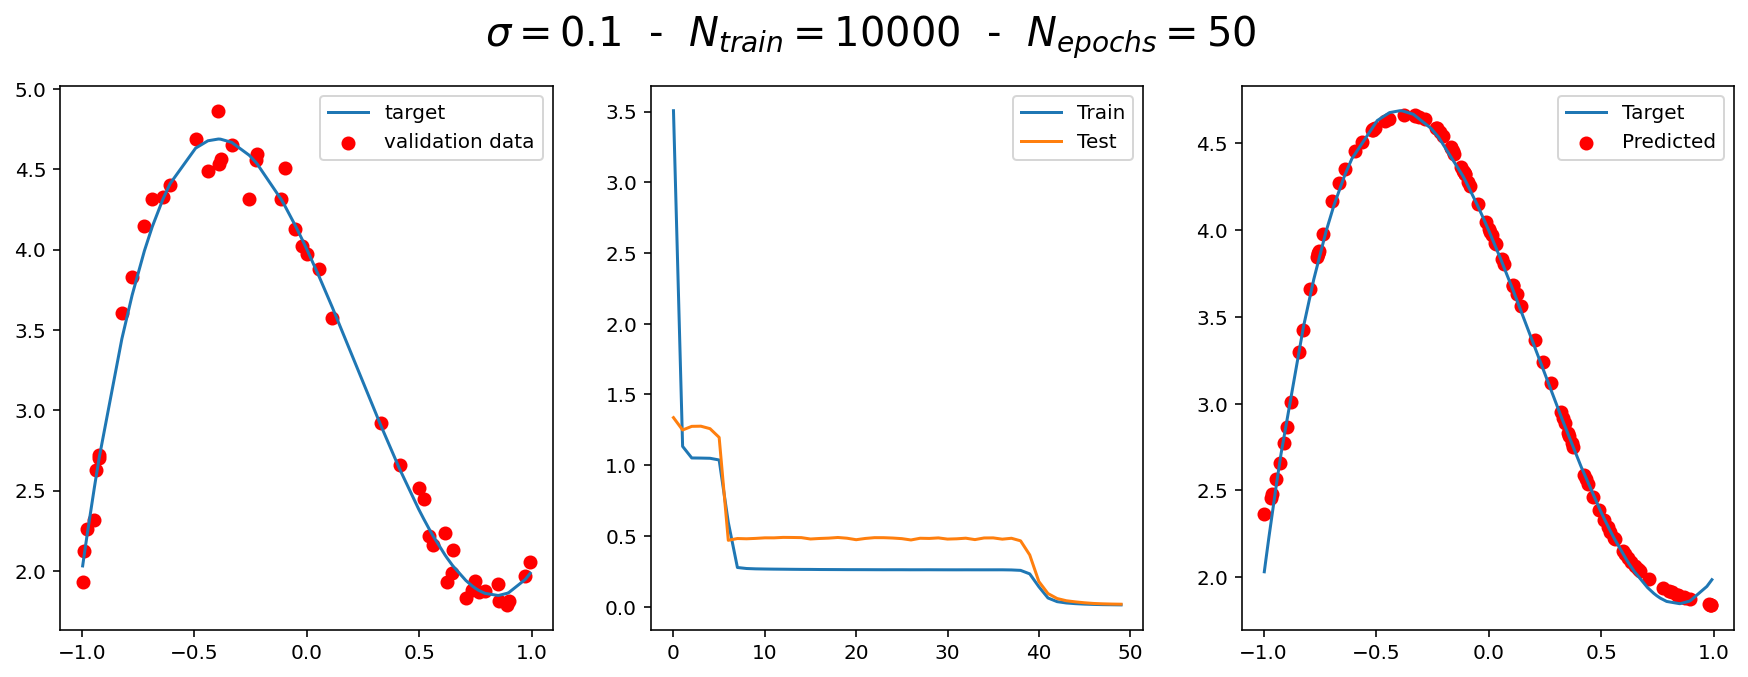

In [43]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1))

model_poly_1(0.1, 10000, 50, model, 'Adam', 'mse')

A preliminary note before choosing the best performing combination: it could be seen for some cells that the result totally changed upon running multiple itmes the same cell (so restarting the training). For these NNs the number of training points has been made higher. Anyway this is clearly a bad feature for a NN and thus the combinations yielding such problem were not chosen.

The best combination is the second one used so: Relu, Adam, MSE. Now the performance of the NN can be tested on points lying outside the training range.

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 20)                40        
                                                                 
 dense_172 (Dense)           (None, 15)                315       
                                                                 
 dense_173 (Dense)           (None, 11)                176       
                                                                 
 dense_174 (Dense)           (None, 8)                 96        
                                                                 
 dense_175 (Dense)           (None, 5)                 45        
                                                                 
 dense_176 (Dense)           (None, 2)                 12        
                                                                 
 dense_177 (Dense)           (None, 1)               

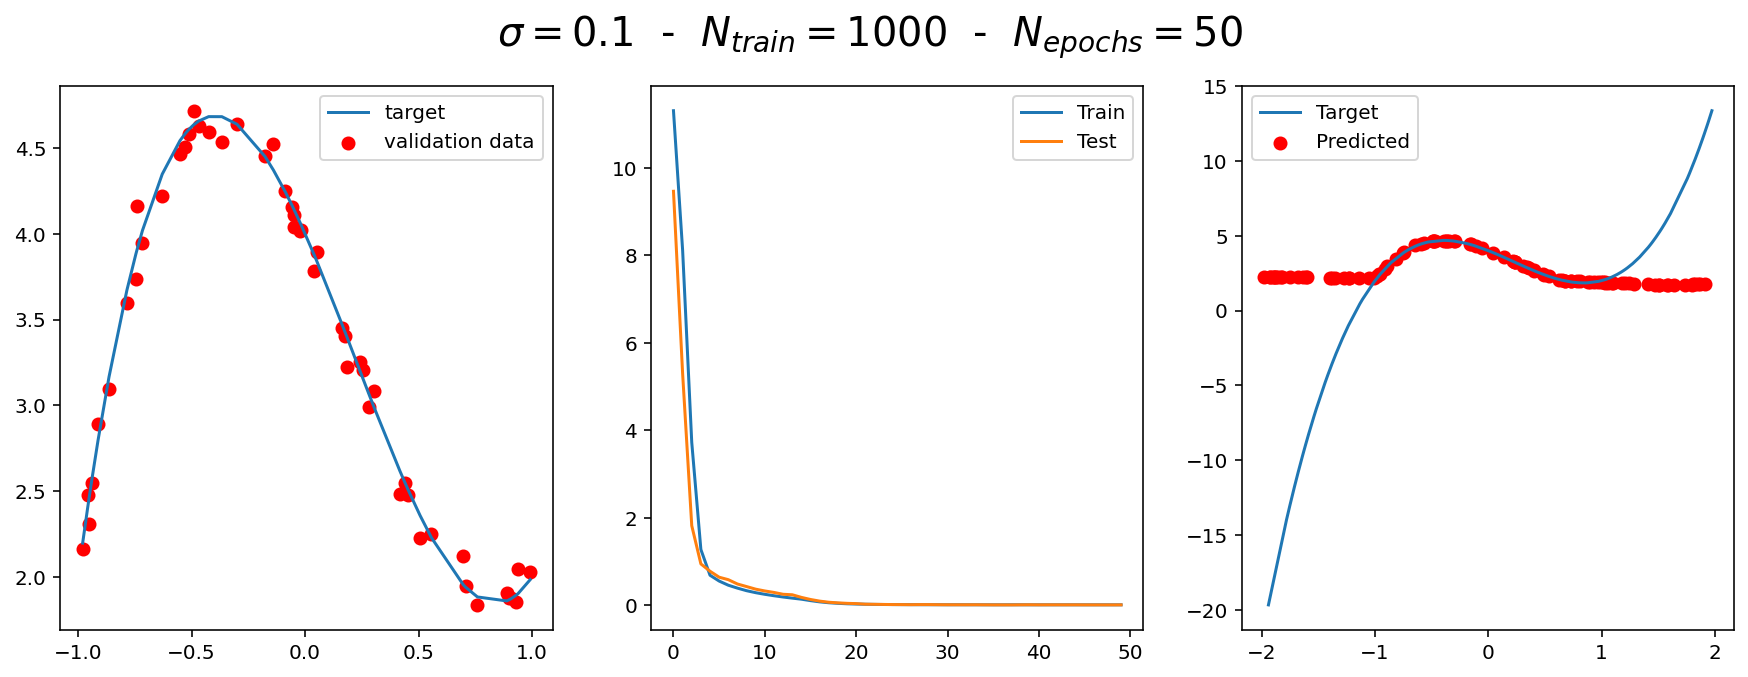

In [44]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

model_poly_2(0.1, 1000, 50, model, 'Adam', 'mse')

As can be seen the model does not perform well outside the range of the training points and simply follows the trend given by the left (right) part of the data inside the training range


### Exercise 11.3
  
The model is extended to a simple 2D function $f(x) = sin(x^2+y^2)$. The parameters are $N_{train} = 10000$ training data points $(x;y)$ and $N_{validation} = 1000$ validation points. The NN tree is chosen as $\{40,30,15,5,1\}$ and the functions are:
- activation: relu
- optimizer: sgd
- loss: mse

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 40)                120       
                                                                 
 dense_123 (Dense)           (None, 30)                1230      
                                                                 
 dense_124 (Dense)           (None, 15)                465       
                                                                 
 dense_125 (Dense)           (None, 5)                 80        
                                                                 
 dense_126 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________
None
32/32 [==============================] - 0s 2m

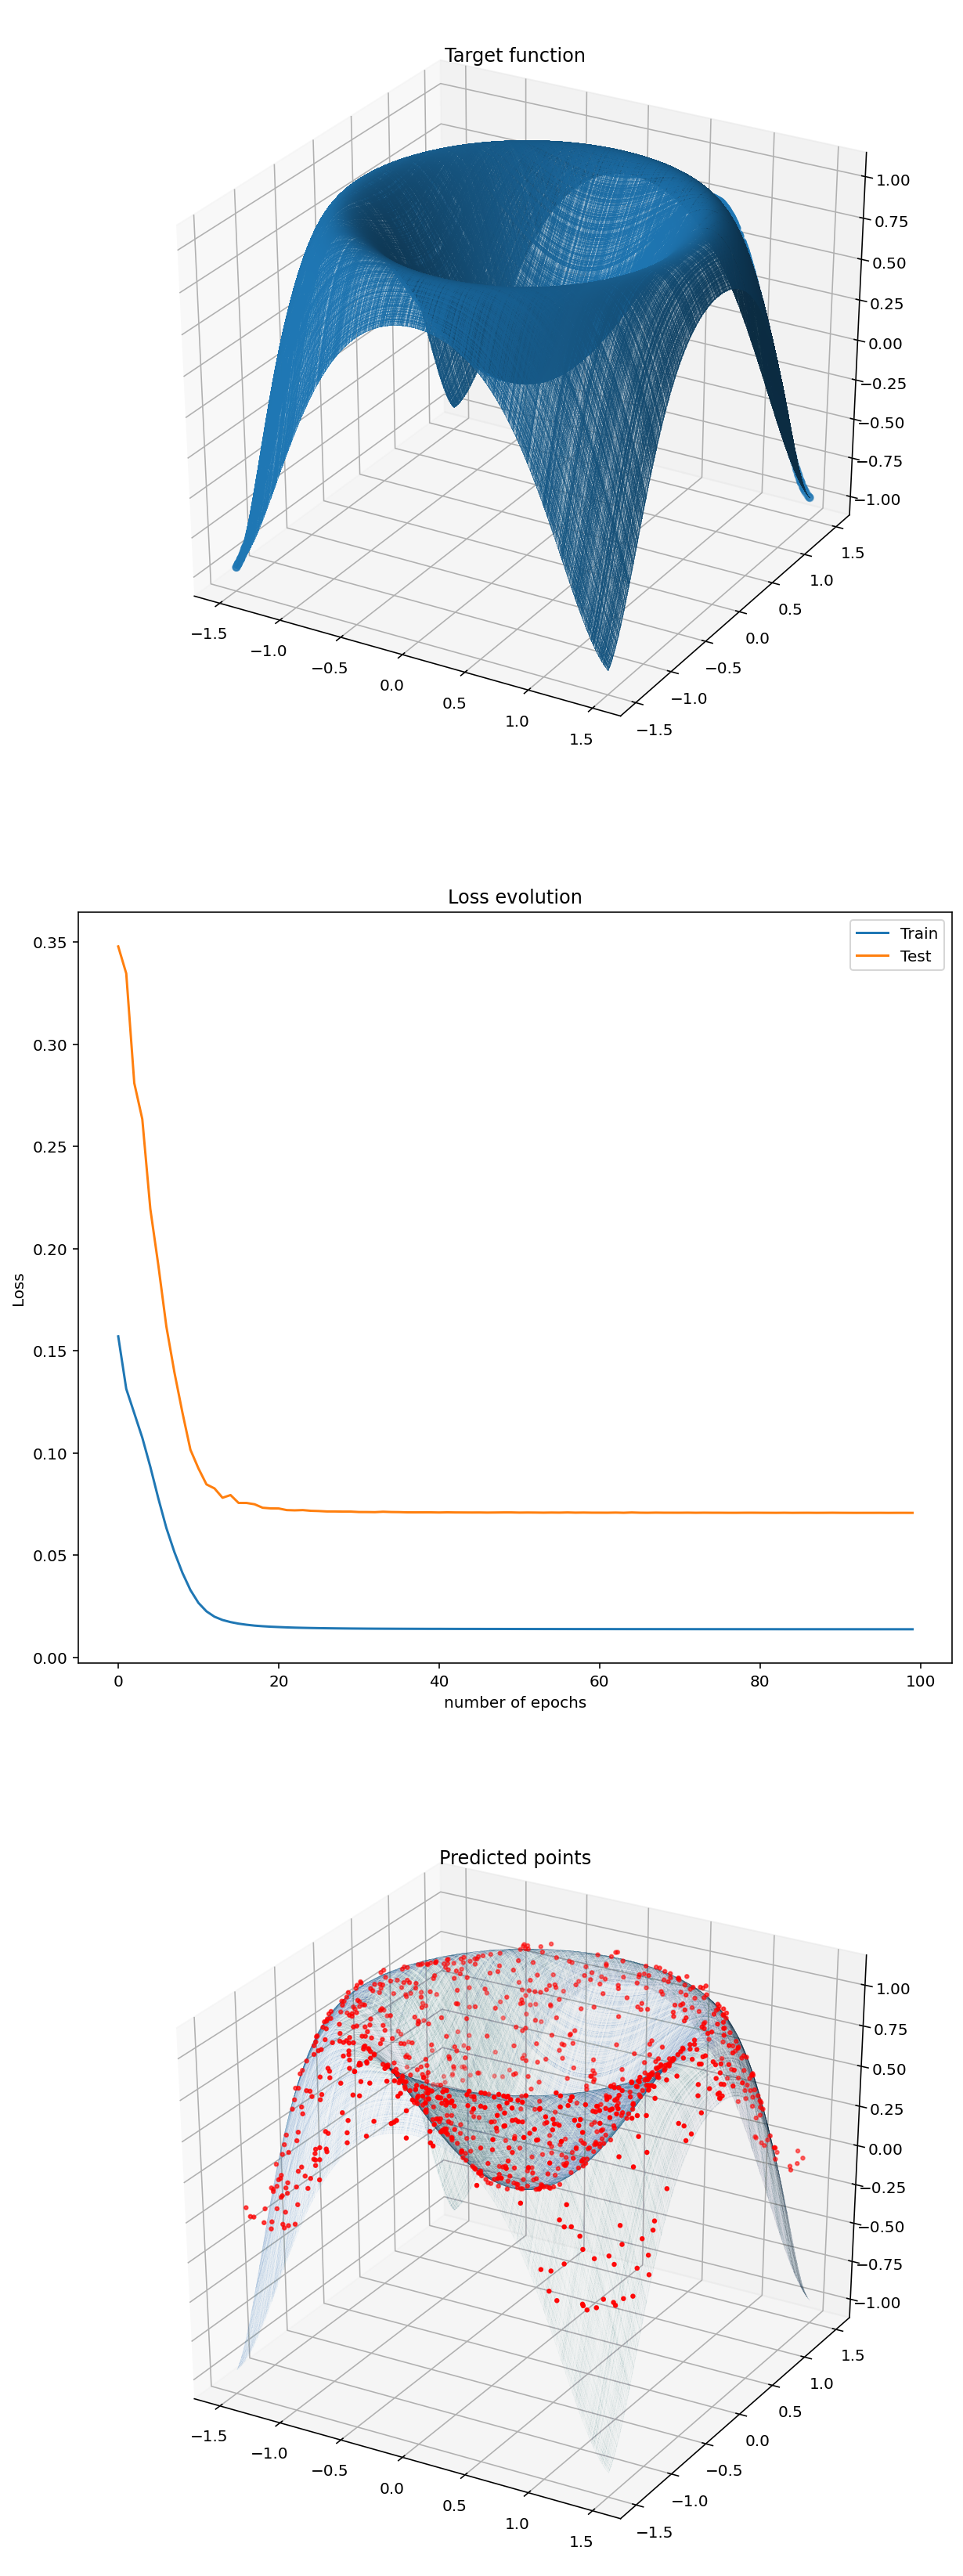

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000)
y_train = np.random.uniform(-1.5, 1.5, 10000)

x_valid = np.random.uniform(-1.5, 1.5, 1000)
y_valid = np.random.uniform(-1.5, 1.5, 1000)

x_valid.sort()
y_valid.sort()
z_target = np.sin(x_valid**2+y_valid**2) # ideal (target) polynomial function

sigma = 0.0 # noise standard deviation
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

fig = plt.figure(figsize=(10, 30))

ax = fig.add_subplot(311, projection='3d')
ax.scatter3D(x_valid, y_valid, z_valid)
ax.set_title('Target function')


x, y = np.meshgrid(x_valid, y_valid)

surf = ax.plot_surface(x, y, np.random.normal(np.sin(x**2+y**2), sigma), rstride = 1, cstride = 1, alpha=0.4, linewidth=0, antialiased=False, label = "set points")


model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(2,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

xy_train = np.array([x_train,y_train])
xy_train = np.transpose(xy_train)
xy_valid = np.array([x_valid, y_valid])
xy_valid = np.transpose(xy_valid)


history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(xy_valid, z_valid), verbose = 0)
#print(model.get_weights());
print(model.summary());
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ax = fig.add_subplot(312)
ax.plot(history.history['loss'], label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_xlabel('number of epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss evolution')
ax.legend()



x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
xy_predicted = np.array([x_predicted,y_predicted])
xy_predicted = np.transpose(xy_predicted)
z_predicted = model.predict(xy_predicted)

ax = fig.add_subplot(313, projection = "3d")
ax.scatter3D(x_predicted, y_predicted, z_predicted, color='r', marker='.')
surf = ax.plot_surface(x, y, np.random.normal(np.sin(x**2+y**2), sigma), rstride = 1, cstride = 1, linewidth=0, antialiased=False, label = "set points", alpha=0.01)
ax.set_title('Predicted points')
plt.show()
